<a href="https://colab.research.google.com/github/institutohumai/cursos-python/blob/master/MatematicasParaIA/6_Probabilidad/probabilidad.ipynb"><img src='https://colab.research.google.com/assets/colab-badge.svg'/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.optimize import minimize

# Tabla de Contenidos

* Introducción
  * Qué es la probabilidad y por qué estudiarla
  * "Probabilidades" versus "Estadística"
  * Hagamos un experimento
* Definiciones básicas
  * Espacio Muestral
  * Medida de Probabilidad
  * Ejemplos e Introducción a Monte Carlo
  * Variables Aleatorias
  * Distribuciones de probabilidad
* Probabilidad condicional
  * Independencia
  * Teorema de Bayes
* El caso continuo y la distribución normal
* Medidas de tendencia central y de variabilidad
  * Esperanza
  * Moda y mediana
  * Varianza y desviación estándar
* Distribuciones multivariadas
  * Marginalización
  * Probabilidad condicional en el continuo
  * Medidas de asociación
* Dos grandes Teoremas
  * Ley de los Grandes Números
  * Teorema del Límite Central
* Material adicional

# Introducción a la probabilidad

## ¿Qué es la probabilidad y por qué estudiarla?

La probabilidad es un concepto matemático increíblemente útil para modelar el mundo. La principal razón de esto es que, de una u otra forma, nos permite tener en cuenta de modo formalizado (y más aún, cuantitativo) el hecho de que nuestro conocimiento sobre el estado de cosas del mundo siempre es imperfecto.

Es por esto que incluso si asumimos un mundo físico completamente determinístico (tal como parecía ser el caso en la época de esplendor de la física clásica), las probabilidades siempre tendrán un rol fundamental en nuestra descripción de ese mundo.

Quizá sepamos, intuitivamente, que la probabilidad es algo que se predica sobre un *evento*, en general un evento futuro. Es decir, nos anticipamos a que en cierto momento realizaremos una *observación* de alguna situación o variable en el mundo (por ejemplo, que esté lloviendo, o que la temperatura sea $25^{\circ} \text{C}$) y nos preguntamos cuál es la probabilidad de que nuestra observación sea "sí se produjo el evento", "no se produjo el evento" o "el valor de la variable $T$ es $23,4^{\circ} \text{C}$".

Nuestro objetivo inicial será entender qué quiere decir esto.

## "Probabilidades" versus "Estadística"

La Teoría de Probabilidades y la Estadística no son lo mismo como disciplinas matemáticas, y hay investigadores que se dedican enteramente a una u otra. Sin embargo desde el punto de vista de la ciencia de datos, la principal aplicación de la Teoría de Probabilidades siempre va a ser la Estadística. En esta clase vamos a concentrarnos en la Teoría de Probabilidades, mientras que la Estadística será el tópico de la clase próxima.

Es muy posible que de todas formas se estén preguntando ¿Cuál es la diferencia? Intentemos una pequeña respuesta. Algo muy interesante es que las dos disciplinas recorren caminos "inversos".

Para la Teoría de Probabilidades, las probabilidades de que ocurran un evento u otro son cantidades *conocidas*. Es decir, se asume que tenemos un conocimiento exacto sobre esas probabilidades; un conocimiento exacto sobre *cuánto* y *de qué manera* desconocemos los resultados de una observación futura. A partir de este conocimiento exacto (y en general hipotético) de las probabilidades involucradas, el objetivo es predecir la probabilidad de otros eventos, o sintetizar esta información de maneras útiles, o deducir otro tipo de consecuencias a partir de este conocimiento inicial.

Una forma de decir todo esto es que en Teoría de Probabilidades, tenemos un *modelo probabilístico* del mundo (o sea, del recorte del mundo que nos interesa) que está totalmente especificado desde el principio. Y una vez que tenemos ese modelo especificado, lo estudiamos para ver qué podemos decir sobre él. El modelo tengamos en cuenta que puede ser, por ejemplo, qué tipo de distribución tienen las variables que estudiamos (recordar conceptos tales como distribución normal, binomial, geométrica, etc), lo cual ya nos brinda una primera idea de cómo están organizados los datos en este recorte de la realidad que estudiamos.

En cambio, cuando hacemos Estadística, no asumimos un conocimiento previo exacto sobre las probabilidades de que se verifique una u otra observación en el mundo. En Estadística nuestro punto de partida son los *datos*, y a partir de los (pocos) datos que tenemos nuestro objetivo es reconstruir el mejor modelo probabilístico que podamos. ¿Qué quiere decir *mejor*? No es una pregunta fácil, pero en algún sentido deberá tratarse del modelo probabilístico *que mejor se ajuste a los datos*. Encontrar estos modelos (o *estimarlos*, usando la jerga) es el objetivo de la Estadística.

De allí que, recalcamos, Probabilidad y Estadística están íntimamente relacionadas, pero efectúan el camino inverso: la probabilidad parte de un modelo sabiendo de antemano cómo se distribuyen los datos con que contamos; la estadística solo tiene los datos y a partir de ellos debe hallar el modelo o tipo de distribución que mejor se ajuste a ellos.

# Hagamos un experimento

Hay distintas formas de entender cómo es que la probabilidad cuantifica nuestro desconocimiento. En vez de meternos de entrada con una cuestión filosófica potencialmente complicada, comencemos por algo que quizá nos sea relativamente familiar: una función de Python que genere "números aleatorios", por ejemplo la función `randint` de la librería `numpy.random`.

Con esta función, podemos realizar el experimento de tirar muchas veces un dado (de seis caras) y anotar los resultados. Si les parece aburrido, piensen que cuando me enseñaron estas cosas, a mí me hicieron medir cien veces el período de oscilación de un péndulo. ¡Esto por lo menos es más rápido!

Cantidad de cada numero: 
[188 157 170 162 159 164]


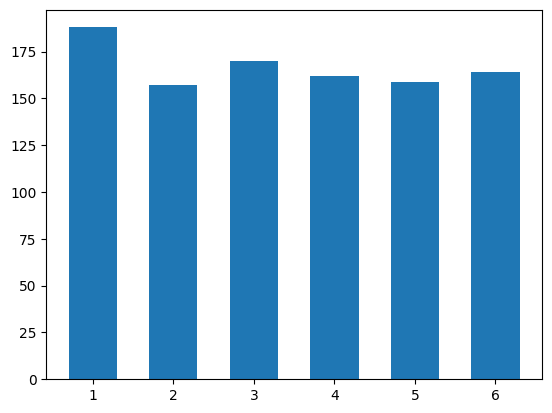

In [2]:
# Hagamos un experimento! Tiremos un dado 1000 veces.

n_experimentos = 1000
resultados = np.random.randint(1, 7, size=n_experimentos)
# Veamos cuántas veces se obtuvo cada cosa con un histograma
valores = np.arange(1, 7)
# bincount nos devuelve cuantas veces se repitieron los numeros que integra el vector resultados. Por ej, el 3 se repitió 162 veces (por decir algo)
conteos = np.bincount(resultados)[1:] # el primer valor es el de cantidad (#) de ceros, pero como no nos interesa porque no usamos el cero aca, lo tiramos
print("Cantidad de cada numero: ")
print(conteos)
plt.bar(valores, conteos, width=0.6)
plt.show()

Vemos que salen más o menos en iguales proporciones, pero no exactamente.

Observemos algunas cosas:
* Cada vez que repetimos las 1000 tiradas, obtenemos algo ligeramente distinto (¡probarlo!). ¿Quiere eso decir que las probabilidades de sacar un cierto número están fluctuando en el tiempo? ¿O siempre es la misma probabilidad, por más que veamos resultados distintos? 
* Si repetimos con muchas más tiradas, vamos a ver que el resultado se hace mucho más consistente:

Cantidad de cada numero: 
[166965 166294 166160 166774 166946 166861]


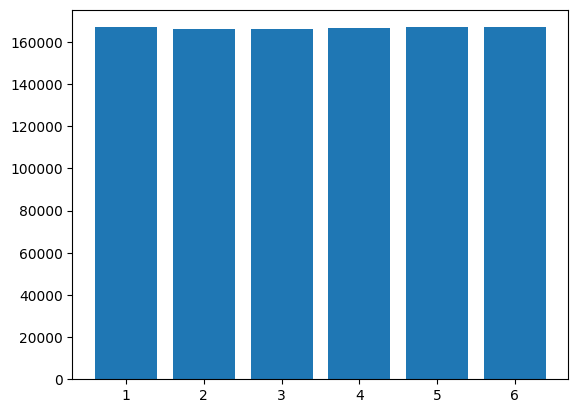

In [3]:
n_experimentos = 1000000
resultados2 = np.random.randint(1, 7, size=n_experimentos)
# Veamos cuántas veces se obtuvo cada cosa con un histograma
valores = np.arange(1, 7)
conteos = np.bincount(resultados2)[1:] # el primer valor es el # de ceros, lo tiramos
print("Cantidad de cada numero: ")
print(conteos)
plt.bar(valores, conteos)
plt.show()

Pero para poder leer mejor esto, nos conviene *normalizar* el histograma, es decir dividir las alturas de las barras por el número total de experimentos, para obtener la fracción de veces que se obtuvo un cierto resultado.

[0.166965 0.166294 0.16616  0.166774 0.166946 0.166861]


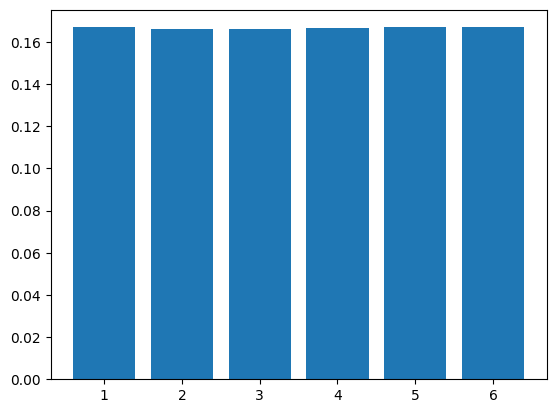

In [4]:
fracciones = conteos / n_experimentos
print(fracciones)
plt.bar(valores, fracciones)
plt.show()

Vemos que las fracciones son todas aproximadamente iguales a $0,16$, que es aproximadamente lo mismo que $1/6 = 0,166666...$.

La fracción de ocurrencias está acercándose a un cierto valor que no fluctúa con cada repetición del experimento (o con cada *realización*, que es la palabra que se usa en la jerga probabilística). Vendría bien ponerle nombre a esos números a los que tienden las alturas del histograma normalizado, ¿verdad? Bueno, podemos ponerle... Sí. Probabilidad. Que cada lado de un dado tiene una probabilidad de $0,16$ de salir (o sea un 16%).

La teoría de probabilidades nos sirve para definir de forma abstracta qué es una probabilidad. Puede que al principio no sea claro que la noción abstracta es la misma que estamos viendo acá, pero quédense tranquilos: la teoría termina demostrando matemáticamente que esta noción de probabilidad como "eso a lo que tiende el histograma" coincide con la definición abstracta. La teoría demuestra, por ejemplo, que a medida que tomo más y más muestras, el histograma normalizado se va pareciendo cada vez más a la distribución de probabilidad de nuestra variable aleatoria. Esto se relaciona con un teorema importante que mencionaremos más adelante: la Ley de los Grandes Números.

Pero me estoy adelantando. Ya usé varias palabras que todavía no vimos: "distribución de probabilidad", "variable aleatoria"... Vayamos a ver bien qué son esas cosas. Pero no dejen los dados muy lejos que ya les vamos a echar mano de nuevo.


# Definiciones básicas

Matemáticamente, formalizamos el espacio de situaciones/eventos/resultados/estados posibles como un conjunto, $\Omega$, que llamamos el *espacio muestral*. Un *evento* no es más que un subconjunto, $E \subseteq \Omega$.

Veamos esto con el ejemplo de la tirada de un dado. En este caso los posibles estados del "mundo", que para nosotros queda recortado al símbolo en la cara superior del dado, es $\Omega = \{1, 2, 3, 4, 5, 6\}$. Ese conjunto es nuestro espacio muestral.

Un ejemplo de evento muy simple es "salió un seis". Matemáticamente, este es el evento $E = \{6\}$. Pero también podemos considerar el evento "el número que salió es impar". Esto corresponde al subconjunto $V = \{1, 3, 5\}$.

## Axiomas de una medida de probabilidad

Es importante saber que las medidas de probabilidad tienen ciertos axiomas que definen de una forma muy, muy precisa qué es la probabilidad. A veces esos axiomas van a sernos útiles y otras veces van a quedar como un detalle de bajo nivel. En el caso de un espacio muestral *discreto* como el del dado, estos axiomas son los siguientes (el caso continuo es importante pero matemáticamente un poco más involucrado, y lo mencionaremos más adelante).

**Definición.** Una *medida de probabilidad* (discreta) es una función $p$ que le asigna a cada evento posible $E$ un número positivo $p(E) > 0$, de forma tal que
1. si $E$ y $V$ son eventos disjuntos (como en el ejemplo de recién, $E$ es 6 y al ser par no se encuentra entre los valores de $V$ que son los impares), $p(E \cup V) = p(E) + p(V)$.
2. $p(\Omega) = 1$, esto es que la probabilidad del espacio muestral en sí es 1 (ya que es la suma de la probabilidad de cada evento)

El primer ítem dice que si dos eventos son *incompatibles* (nunca pueden ocurrir a la vez), la probabilidad del evento combinado "pasó $E$ o pasó $V$") es la suma de las probabilidades individuales. En el caso en que $\Omega$ es infinito (pero discreto, en general es el caso $\Omega = \mathbb{N}$, los números naturales), la propiedad se extiende a colecciones infinitas de subconjuntos: si $(E_i)_{i = 1,\dots}$ son infinitos subconjuntos de $\Omega$, todos disjuntos uno a otro (o sea, son eventos incompatibles), $p(\bigcup_{i=1}^{\infty} E_i) = \sum_{i=1}^{\infty} p(E_i)$.

El segundo ítem dice que las probabilidades suman a uno: siempre alguna de todas las posibilidades tiene que haber ocurrido, y ningún evento puede tener probabilidad mayor a $1$.

Puede demostrarse a partir del primer axioma que si $E$ y $V$ no son disjuntos, en general vale la regla

$$ p(E \cup V) = p(E) + p(V) - p(E \cap V),$$

que resulta bastante útil para hacer cuentas.

Referencias adicionales:

$ p(E \cup V) $: es equivalente a decir ocurrió $E$ o bien ocurrió $V$, pero no los dos al mismo tiempo

$ p(E \cap V) $: es equivalente a decir ocurrió $E$ y al mismo tiempo ocurrió $V$

### Volviendo al ejemplo

En este caso, partimos de la base de que todos los números ocurren con igual frecuencia. Es importante notar que esta es una hipótesis fáctica sobre el estado material del dado (que es simétrico y no está cargado con ningún peso adicional en ningún lado) y sobre el proceso físico de tirado del dado (por ejemplo, asumimos que quien tira el dado no tiene un control sobrehumano sobre sus músculos que le permite asegurarse de que cierta cara del dado quedará boca arriba).

Una vez hecha esta hipótesis, nuestro modelo dice que el número $i$ sale $f_i = 1/6$ de las veces (distribución uniforme). Los números $f_i$, que son las frecuencias relativas de cada resultado, determinan la medida de probabilidad $p$, pero $p$ le asigna una probabilidad no solo a los eventos $\{1\}, \{2\}, \dots \{6\}$, sino que le asigna una probabilidad a cada subconjunto de $\Omega = \{1, 2, 3, 4, 5, 6\}$. Traducido, todas las demás probabilidades pueden calcularse utilizando el axioma de la suma de probabilidades.

Por ejemplo: *¿Cuál es la probabilidad de sacar un número par **o** un número que sea múltiplo de 3?*

* $\Omega = \{1, 2, 3, 4, 5, 6\}$, $A = \text{par}$ o sea $A = \{2, 4, 6\}$, $B = \text{multiplo de 3}$, o sea $B = \{3, 6\}$
* $ P(A) = \frac{3}{6} = 0.5$, ya que $ P(A) = \frac{1}{6} + \frac{1}{6} + \frac{1}{6}$
* $ P(B) = \frac{2}{6} = \frac{1}{3}$, ya que $ P(B) = \frac{1}{6} + \frac{1}{6} $
* $ P(A \cap B) = \frac{1}{6}$, ya que $ A \cap B = \{6\}$
* $\implies P(A \cup B) = \frac{3}{6} + \frac{2}{6} - \frac{1}{6} = \frac{4}{6} = \frac{2}{3} $

Les recomiendo ahora hacer el siguiente ejercicio guiado para cimentar estas ideas.

**Ejercicio de lectura activa (1)**:

(a) Programando, generar una lista con todos los eventos posibles (subconjuntos de $\Omega$) y calcular la probabilidad de cada uno de ellos.

(b) Elegir tres eventos $E, V, W$ que sean incompatibles (subconjuntos disjuntos) y tales que su unión sea $\Omega$ (es decir, necesariamente alguno de los tres ocurre, pero si ocurre uno, no puede haber ocurrido ninguno de los otros dos). Verificar que entonces $p(E \cup V \cup W) = p(E) + p(V) + p(W) = 1$.

(c) En un cierto juego de mesa, se tira un dado y según el resultado, ciertos jugadores ganan y ciertos jugadores pierden. Necesito que salga un $5$ o un $6$ para ganar, mientras que a mi amigo, el [Caballero de Méré](http://materias.df.uba.ar/estadisticaa2019v/files/2019/02/El_caballero_de_Mere.pdf)\* le alcanza para ganar que salga cualquier cosa menos un $1$. Llamemos $G$ al evento "yo gané", y $M$ al evento "el Caballero ganó". Calcular $p(G \cup M)$ y $p(G) + p(M)$. ¿Cuál de los dos números corresponde a la probabilidad de que alguno de los dos amigos gane, y por qué?

***
\* Nota al pie: en el link encontrarán un interesante artículo en español sobre los orígenes de la teoría de probabilidades, que pueden chusmear en su tiempo libre luego de estudiar esta clase. Como verán, no es casualidad que usemos juegos de azar para ejemplificar las estas ideas... Estos juegos fueron la motivación misma detrás del desarrollo de la teoría en el Siglo XVII.

In [5]:
# Ejercicio 1.a

def calcular_eventos(omega):
  lista_de_eventos = []
  start, stop = omega
  for i in range(start, stop+1, 1):
    lista_de_eventos.append(i)
  return lista_de_eventos

def calcular_probabilidades(lista_de_eventos, f_i = 1/6):
  lista_de_probabilidades = []
  for evento in lista_de_eventos:
      lista_de_probabilidades.append(f_i);
  return lista_de_probabilidades


lista_eventos = calcular_eventos((1, 6))
lista_probabilidades = calcular_probabilidades(lista_eventos)

print(lista_eventos)
print(lista_probabilidades)

[1, 2, 3, 4, 5, 6]
[0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666]


In [6]:
# Ejercicio 1.b

e = list(filter(lambda x: x <= 2, lista_eventos))
v = list(filter(lambda x: x % 3 == 0, lista_eventos))
w = list(filter(lambda x: x == 4 or x == 5, lista_eventos))

print(e)
print(v)
print(w)

total = sum(calcular_probabilidades(e + v + w))
print(total)

[1, 2]
[3, 6]
[4, 5]
1.0


In [7]:
# Ejercicio 1.c

g = set(filter(lambda x: x == 5 or x == 6, lista_eventos))
m = set(filter(lambda x: x > 1, lista_eventos))

print("Conjunto G:", g)
print("Conjunto M:", m)

g_union_m = g.symmetric_difference(m)
g_plus_m = g.union(m)
print("G U M:", g_union_m)
print("G + M", g_plus_m)

p_g_union_m = sum(calcular_probabilidades(list(g_union_m)))
print("p(G U M):", p_g_union_m)
p_g_plus_m = sum(calcular_probabilidades(list(g_plus_m)))
print("p(G + M): %0.3f" % p_g_plus_m)

Conjunto G: {5, 6}
Conjunto M: {2, 3, 4, 5, 6}
G U M: {2, 3, 4}
G + M {2, 3, 4, 5, 6}
p(G U M): 0.5
p(G + M): 0.833


# Ejemplos e Introducción a Monte Carlo

Consideremos otros ejemplos de espacio muestral. En el camino, aprenderemos un método fundamental para estudiar distribuciones de probabilidad, para generarlas pero también para entenderlas y pensarlas: la simulación de Monte Carlo.

## Bitmaps

Consideremos un bitmap de $N \times N$: una matriz que contiene un $0$ o un $1$ representando píxels blancos y negros. Definamos nuestro espacio muestral como el conjunto de todos los bitmaps: $\Omega = \{\text{bitmaps}\} = \{M \in \{0, 1\}^{N \times N}\}$. Para ser más concretos digamos que $N=10$, y consideramos el evento $E$ definido como "la imagen contiene una cara" (o, para ser más precisos, "la imagen es tal que una mayoría abrumadora de seres humanos afirmaría ver una cara allí").

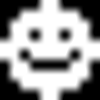

In [8]:
# Un bitmap de ejemplo.

from PIL import Image

n = (0,0,0) # negro
b = (255,255,255) # blanco

bitmap = [[n,n,n,n,b,b,n,n,n,n],
 [n,n,b,b,b,b,b,b,n,n],
 [n,b,b,b,b,b,b,b,b,n],
 [n,b,b,n,b,b,n,b,b,n],
 [b,b,b,b,b,b,b,b,b,b],
 [b,b,n,b,b,b,b,n,b,b],
 [n,b,b,n,n,n,n,b,b,n],
 [n,b,b,b,b,b,b,b,b,n],
 [n,n,b,b,b,b,b,b,n,n],
 [n,n,n,n,b,b,n,n,n,n]]

cara = Image.new("RGB", (10,10))
width, height = cara.size

for row in range(height):
  for col in range(width):
    cara.putpixel((col, row), bitmap[row][col])

cara = cara.resize((100,100))
display(cara)

Si suponemos que cada píxel tiene una probabilidad $p = 0.5$ de ser blanco y una probabilidad $0.5$ de ser negro, ¿Cuál es la probabilidad $p(E)$ de que la imagen contenga una cara?

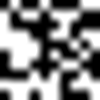

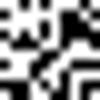

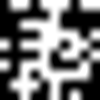

In [9]:
def generar_bitmap_aleatorio():
  N = 10
  otro_bitmap = [[n]*10]*10 # genero bitmap lleno de píxels negros

  imagen = Image.new("RGB", (10,10))
  width, height = imagen.size

  for row in range(height):
    for col in range(width):
      # pongo unos de forma aleatoria
      otro_bitmap[row][col] = b if np.random.rand() > 0.5 else n
      imagen.putpixel((col, row), otro_bitmap[row][col])

  imagen = imagen.resize((100,100))
  display(imagen)
  return bitmap, imagen

_ = generar_bitmap_aleatorio()
_ = generar_bitmap_aleatorio()
_ = generar_bitmap_aleatorio()
# ¿Contienen estas imágenes una cara?

Como se imaginarán, esta pregunta no se puede responder así sin más (además la respuesta va a ser que la probabilidad es *muy baja*). Una estrategia posible es generar bitmaps aleatorios y preguntarle a muchas personas si ven o no ven caras en las imágenes. Otra sería entrenar un modelo de Machine Learning para reconocer caras en bitmaps, y luego usarlo sobre un montón de imágenes generadas aleatoriamente. Lo importante ahora es reconocer que **los posibles inputs a un problema de clasificación también constituyen un ejemplo de espacio muestral**.

## Juguemos al Colonos

Quienes hayan jugado alguna vez a [cierto juego de mesa famoso](https://www.youtube.com/watch?v=eEq-0inAWzk) (y altamente recomendable), sabrán por experiencia que cuando tiramos dos dados y sumamos los dos números observados, algunos resultados son mucho más frecuentes (es decir, probables) que otros. También sabrán quizá que el número más probable es el $7$. Este hecho de la naturaleza, por más trágico que sea cada vez que tenemos demasiadas cartas en la mano, tiene bastante sentido intuitivamente: el $7$ es el número que se obtiene de más formas distintas como combinación de dos números entre $1$ y $6$ (es $1+6$, pero también es $2+5$, pero también es $3+4$...)

¿Cuál es la probabilidad exacta de que salga un $7$? Y ¿Cuál es la probabilidad de que salga $x$ para cada valor posible de $x$ entre $2$ y $12$ (que son todos los valores posibles para la suma de dos dados)?

Vamos a responder esta pregunta de dos maneras, una difícil y otra fácil. La difícil, o a mano, nos sirve para ejercitar el concepto de espacio muestral, y la fácil nos introduce al importante mundo de las simulaciones Montecarlo. (En verdad no estoy seguro de si una es realmente más fácil que la otra, cada uno tendrá su propia apreciación al respecto).

### Respuesta a mano

Ahora nuestro espacio muestral consiste en los pares $(i, j)$ con $i, j \in \{1, 2, 3, 4, 5, 6\}$. Matemáticamente podemos escribir $\Omega = \{(i, j) : i, j \in \{1, 2, 3, 4, 5, 6\}\}$ o lo que es lo mismo, $\Omega = \{1, 2, 3, 4, 5, 6\} \times \{1, 2, 3, 4, 5, 6\}$. Lo que tenemos que hacer es identificar cómo se traduce matemáticamente el evento que nos interesa, y luego calcular su probabilidad. En nuestro caso, todos los elementos de $\Omega$ tienen la misma probabilidad $1/N$, donde $N$ es la cantidad de elementos del espacio muestral (recordar que "elemento del espacio muestral" no es lo mismo que "evento"; los eventos pueden ser cosas más generales que tan solo un elemento de $\Omega$).

Lo que sigue es hacer un poco de cuentas muy sencillas, pero son ustedes quienes tienen que hacerlas. Después de intentarlo por su cuenta, pueden mirar las respuestas más abajo. ¡Confío en ustedes!

**Ejercicio de lectura activa (2)**:

(a) ¿Cuál es el número $N$ de elementos que tiene nuestro nuevo espacio muestral? A partir de esto, concluir cuál es la probabilidad de que salga algún par $(i, j)$ particular (va a ser $1 / N$, porque asumimos que los dados no están cargados).

(b) ¿Cómo se escribe el conjunto $E \subseteq \Omega$ correspondiente al evento "salió un $7$"?

(c) ¿Cuál es la probabilidad de dicho evento?


In [10]:
# Responder aquí






<details>
<summary>(Cuando estén listos, pueden ver las respuestas haciendo click acá.)</summary>
Respuestas:

(a) son $6 \times 6 = 36$ elementos. Luego la probabilidad de cada elemento es $1/36$.

(b) Las formas en que puede salir un $7$ son los elementos

$$E = \{(1, 6), (2, 5), (3, 4), (4, 3), (5, 2), (6, 1)\},$$

(c) $E$ tiene $6$ elementos, y todos tienen probabilidad $1/36$. Por lo tanto la probabilidad de obtener un $7$ es $6/36 = 1/6$.
</details>

### Respuesta mediante simulación Monte Carlo

Una persona más amiga del generador de números aleatorios podría preguntarse: "¿Para qué hacer todas estas cuentas a mano? Si puedo generar un número aleatorio entre $1$ y $6$ con `np.random.randint`, como hicimos hace un rato, también puedo generar dos números y sumarlos. Haciendo muchas veces lo mismo y armándome un histograma (normalizado), puedo conocer no solo la probabilidad de obtener un $7$, sino las probabilidades de obtener todas las sumas posibles."

Esta dichosa persona habrá descubierto la esencia del *método de Monte Carlo*. Sigamos, pues, sus sabias instrucciones.

p(2) = 0.02781
p(3) = 0.055402
p(4) = 0.083575
p(5) = 0.111657
p(6) = 0.138607
p(7) = 0.165683
p(8) = 0.138779
p(9) = 0.111466
p(10) = 0.083442
p(11) = 0.055787
p(12) = 0.027792


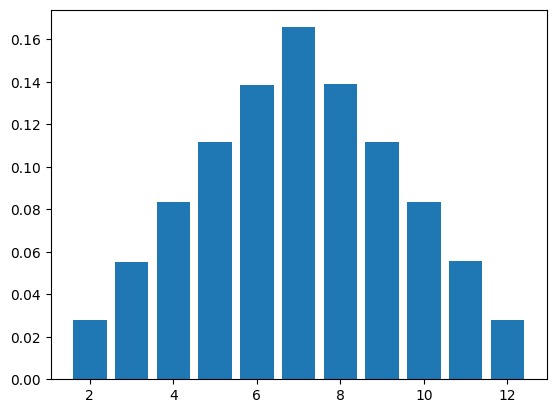

In [11]:

# Hagamos una "simulación de Monte Carlo" para obtener la probabilidad de que
# dos dados sumen un cierto valor.
n_experimentos = 1000000
# Ahora cada experimento nos da dos números, uno por cada dado
resultados = np.random.randint(1, 7, size=(n_experimentos, 2))
# print(resultados)
sumas = np.sum(resultados, axis=1) # suma los pares de cada fila (cada fila es como si contuviera el resultado de dos dados)
# print(sumas)
# Veamos cuántas veces se obtuvo cada cosa con un histograma
valores_posibles = np.arange(2, 13)
conteos = np.bincount(sumas)[2:] # tiramos los primeros dos, que siempre son 0
fracciones = conteos / n_experimentos
plt.bar(valores_posibles, fracciones)
for i in range(11):
  print("p({}) = {}".format(valores_posibles[i], fracciones[i]))

No solo obtenemos (aproximadamente) el mismo resultado $p(7) = 0.166...$ para el $7$ sino que "por el mismo precio" obtenemos las probabilidades para todas los resultados posibles. Está bueno, ¿Verdad?
Por otra parte, descubrimos que efectivamente el 7 es el que mayor probabilidades tiene de salir en la suma de los dos dados.
***


# Variables Aleatorias

¿Qué es esta *cosa* que adopta valores entre $2$ y $12$, valores que fluctúan entre una y otra realización del experimento y que aparecen con frecuencias relativas $0.028$, $0.056$, etcétera?

El conformista dirá:

> "Pues no es más que una colección de distintos eventos, es decir subconjuntos de $\Omega$,

$$E_2 = \{(1, 1)\}$$ $$E_3 = \{(1, 2), (2, 1)\}$$ $$E_4 = \{(1, 3), (2, 2), (3, 1)\}$$ $$\dots$$ $$E_{12} = \{(6, 6)\}.$$

> Por ejemplo, cuando nos preguntamos si la suma de los dados dio $2$, nos estamos preguntando por el evento $E_2$. No hay nada nuevo bajo el sol."

Pero una persona más soñadora se atreverá a pensar que algo mejor que esto es posible. Quizá diga:

> "La función $X: \Omega \to \{2, 3, \dots , 12\}$, definida por

$$ X(i, j) = i + j $$

> le asigna a cada situación del mundo $\omega \in \Omega$ un cierto número $X(\omega)$, y lo único que me importa es ese número, y no la situación $\omega$ en sí misma" [que en nuestro caso es una tupla de dos números $(i, j)$].

> "$X$ vendría a ser una variable, de hecho es algo que yo puedo ir y medir una vez que se obtiene una realización del experimento. Pero es una variable que fluctúa: no siempre adopta el mismo valor, porque no siempre se realiza el mismo $\omega$."

Nuestra soñadora habrá descubierto las variables aleatorias.

**Definición**. Una *variable aleatoria* (o "v.a.") $X$ es una función $X: \Omega \to S$ del espacio muestral a otro conjunto $S$, en general numérico, como los naturales $\mathbb{N}$, los enteros $\mathbb{Z}$ o los reales $\mathbb{R}$.

Puede parecer raro a simple vista que una *variable* sea una *función*, pero es bastante natural si pensamos que "lo que genera el mundo" (o lo que genera nuestro modelo del mundo) es un $\omega \in \Omega$, y una vez generado y fijado ese $\omega$, todas las variables quedan fijadas de forma determinística. En cierto sentido, $\omega$ "encapsula" toda la aleatoriedad de nuestro modelo. Por ejemplo, cuando codeamos un modelo, muchas veces generamos números aleatorios en una única línea, y después tan solo realizamos operaciones determinísticas con esos números aleatorios de partida. La definición matemática de una variable aleatoria captura esta idea: esos números aleatorios que generamos en la primera línea vienen a ser nuestro $\omega$, y la función $X(\omega)$ corresponde a lo que hacemos después con ellos.

Dicho de otra manera, $\omega$ es nuestro conjunto de posibilidades iniciales, y la variable aleatoria es lo que nos da el resultado tras un ensajo/observación a partir de ellos. Puede haber resultados que tiendan a "aparecer" más que otros, es decir, que tengan más probabilidades que otros de salir. 

Más arriba, nuestro personaje poco imaginativo nos señaló algo importante (rescatémosle algo positivo): para calcular la probabilidad que nuestra variable aleatoria $X(\omega) = X(i, j) = i + j$ adopte un cierto valor $X = r$, tenemos que mirar todos los $\omega = (i,j) \in \Omega$ tales que $X(\omega) = r$. Es decir, **$X = r$ también es una forma de describir un evento**. En nuestro caso, $X = 2$ es el evento $E_2$, $X = 3$ es el evento $E_3$, y así sucesivamente. ¿Y $X = 37$? Bueno, no hay ninguna tirada que sume $37$, así que esto corresponde al evento vacío, $\emptyset$, que siempre tiene probabilidad $0$.

En todos estos casos, se tiene que $E_r$ es el conjunto de todos los $\omega$ tales que $X(\omega) = r$. Matemáticamente esto se denomina el *conjunto preimagen* de $r$, y se escribe $X^{-1}(r)$. Más aún, la probabilidad de obtener $X = r$ es igual a la probabilidad que asigna nuestra medida $p$ a ese conjunto $E_r$.

Esto nos sugiere cuál es la definición general para cualquier variable aleatoria.

**Definición**. Dado un espacio muestral $\Omega$, una medida de probabilidad $p$ y una variable aleatoria $X: \Omega \to S$, la "probabilidad de que $X = r$" se define como

$$\text{Pr}(X = r) = p(X^{-1}(r))$$

## ¿Jugamos al Backgammon?

En el Backgammon, en vez de sumarse los dos números obtenidos, el jugador puede utilizar cada dado por separado para mover una de sus fichas. Puede elegir usar los dados en el orden que quiera, y para usar un dado, elige una ficha y la mueve tantos casilleros como indica el dado.

Partamos del mismo espacio muestral que recién:

$$\Omega = \{(i, j) : i, j \in \{1, 2, 3, 4, 5, 6\}\}$$

Les propongo intentar responder una pregunta por su cuenta. Piénsenlo un ratito, y después vean la respuesta que propongo.

**Ejercicio de lectura activa (3)**: ¿Cuál es la probabilidad de sacar un $3$ y un $4$, y cuál es la probabilidad de sacar dos $4$? ¿Son la misma o son distintas?

In [12]:
# Responder aquí

# Listo? Ahora pueden hacer click más abajo.


<details>
<summary>(Cuando estén listos, pueden ver la respuesta haciendo click acá.)</summary>
La pregunta puede parecer extraña o tramposa. En verdad, la respuesta depende de qué quiere decir "sacar un $i$ y un $j$", y para saber qué quiere decir en este caso, debemos remitirnos a las reglas del Backgammon. En el Backgammon, las situaciones $\omega = (i, j)$ y $\omega = (j, i)$ son totalmente indistinguibles para el jugador. Los dados no están ordenados, y pueden usarse en el orden que el jugador desee. Entonces el evento "sacar un $3$ y un $4$ se formaliza como $E = \{(3, 4), (4, 3)\}$, luego tiene probabilidad $2/36 = 0.5555\dots$, mientras que el evento "sacar dos $4$" se formaliza como $V = \{4, 4\}$, luego tiene probabilidad $1/36 = 0.1666\dots$. La diferencia está en que hay solo una manera de sacar dos cuatros, mientras que hay dos formas distintas de sacar un cuatro y un tres.
</details>

***

¿Ya pensaron y leyeron la respuesta? En ese caso, seguimos.

***

Si quieren podemos formalizar esto como una variable aleatoria. Podemos decir que en nuestro caso $X$ toma un par ordenado $(i, j)$ y devuelve no un número, sino otro par, pero en este caso *no ordenado*. Podemos por ejemplo usar la estructura de datos `set()` de Python. Si nuestro $\omega$ es una variable de Python `omega = np.random.randint(1, 7, size=2)`, entonces el valor de nuestra variable aleatoria $X(\omega)$ será implementado por la línea de código `X = set(omega)`.

También pueden chequear haciendo una simulación como la que hicimos para la suma que en efecto `set([3, 4])` ocurre con mayor frecuencia que `set([4, 4])`, por más que el valor `[3, 4]` y el valor `[4, 4]` sean asignados a `omega` con la misma frecuencia.
***

# Distribuciones de probabilidad

Cada variable aleatoria tiene asociada una *distribución de probabilidad*: una función, llamémosla $f_X$, que a cada valor posible de $X$ le asigna una probabilidad:

$$ f_X(r) = p(X^{-1}(r)) = \text{Pr}(X = r)$$

Esto puede parecer innecesario, dado que solo estamos introduciendo una nueva notación para lo mismo, pero en realidad resulta muy útil poder hablar de distribuciones de probabilidad. Además en el caso continuo (que todavía no vimos) se vuelven casi indispensables, y se definen de una manera un poco diferente. 

De hecho, no hace falta *primero* introducir una variable aleatoria explícita y luego *obtener* su distribución de probabilidad. En la práctica hablamos de las distribuciones de probabilidad como objetos en sí mismos, a los cuales les podemos asociar una variable aleatoria que las represente. Así, una distribución de probabilidad $f$ sobre el conjunto $S$ (por ejemplo $S = \mathbb{N}$) no es más que una función $f: S \to \mathbb{R}$ tal que $f(x) \geq 0$ y además

$$ \sum_{x \in S} f(x) = 1,$$

es decir que *está normalizada*.

Cuando una variable aleatoria $X$ tiene distribución $f$, escribimos "$X \sim f$" y decimos que $X$ está *distribuida* de acuerdo a $f$.

Veamos esto con unos ejemplos.

* La distribución de probabilidad *de Bernoulli* con parámetro $p$, $\text{Bernoulli}_p$, corresponde al experimento de tirar una moneda cargada, con probabilidad $p$ de salir cara (1) y probabilidad $1-p$ de salir ceca (0). Es decir que si $X \sim \text{Bernoulli}_p$, se tiene $\text{Pr}(X = 1) = p$ y $\text{Pr}(X = 0) = 1-p$.
* La *distribución uniforme discreta* $U(1, \dots 6)$ sobre el conjunto $\{1, 2, 3, 4, 5, 6\}$ nos sirve para representar el experimento de tirar un dado (no cargado) de seis caras. En este caso, se le asigna probabilidad $1/6$ a cada posibilidad (es lo que llamamos `randint` en Python). También la podemos pensar como una distribución sobre todos los números naturales, $f: \mathbb{N} \to \mathbb{R}$, pero que le asigna probabilidad cero a todos los números que no están entre $1$ y $6$.

Acá podemos ver una de las utilidades de las distribuciones de probabilidad. En nuestro ejemplo de los dos dados, podríamos decir que cada dado *es* una variable aleatoria que puede sacar un número/resultado específico, pero los dos dados tienen la misma distribución. Se dice que están *idénticamente distribuidos*, y más aún, *independientes e idénticamente distribuidos* (o "i.i.d.") porque la tirada de un dado no afecta los resultados del otro dado (esta noción de independencia la vamos a formalizar dentro de un par de secciones). Como ven, nunca es mal momento para introducir más jerga.

Con nuestro nuevo lenguaje, podríamos haber comenzado la formalización del experimento "tirar dos dados" así:

> Sean $X_1, X_2 \sim U(1,\dots 6)$ variables aleatorias independientes e idénticamente distribuidas...

Y cuando queríamos hablar de la suma de los dos dados, podríamos haber seguido así:

> Sea $Y = X_1 + X_2$, entonces...



## Más distribuciones de probabilidad

Hay docenas de distribuciones de probabilidad que se suelen usar en aplicaciones de probabilidades y estadística. Una muy importante por ejemplo es la [distribución binomial](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_binomial), $\text{Binom}(n, p)$, que tiene dos parámetros $n$ y $p$. $n$ es el número de ensayos (veces que se repite el experimento), y $p$ es la probabilidad de éxito (según qué opción se considere éxito). Esta distribución sirve para evaluar la probabilidad de una cierta cantidad de éxitos en $n$ ensayos, con una probabilidad de éxitos $p$. Por ejemplo, en 5 ensayos o repeticiones, quiero saber qué probabilidad hay de que tirar dos dados sume 3 en 2 ensayos de esos 5, teniendo en cuenta una probabilidad de 0.6

Intuitivamente, si $X \sim \text{Binom}(n, p)$, $X$ es el número de veces que una moneda con distribución $\text{Bernoulli}_p$ sale cara, cuando la tiramos $n$ veces. Como se imaginarán esto es muy útil dado que no aplica solo a tiradas de monedas, sino que aplica a cualquier experimento binario, en el cual solo hay dos resultados posibles, que se repita múltiples veces.

Para poder testear esta y otras distribuciones, es muy útil familiarizarse con la librería `scipy.stats`. En ella encontrarán implementaciones de muchísimas distribuciones, que nos permiten entre otras cosas consultar las probabilidades que asignan a distintos resultados, pero también generar números aleatorios a partir de esas distribuciones, lo que se denomina *samplear* o *muestrear* esa distribución. Veamos el caso de la binomial.

Nota 1: a las distribuciones de probabilidad discretas, que son las que estamos viendo por ahora, también se las denomina *probability mass functions* o "PMF", en contraposición con las distribuciones continuas, a las que se les dice *densidades* de probabilidad, *probability density functions* o "PDF".

Nota 2: Las distribuciones de probabilidad más importantes suelen tener una fórmula explícita que nos permite calcular a mano o con una calculadora su valor para cada posible input. Si quieren pueden mirar las fórmulas en los links de Wikipedia, aunque para nosotros eso no es relevante ya que Python puede realizar las cuentas por nosotros.

Nota 3: En los ejercicios de la clase pueden explorar la [distribución de Poisson](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Poisson) y jugar a inventar sus propias distribuciones de probabilidad visualizándolas mediante simulaciones Monte Carlo.

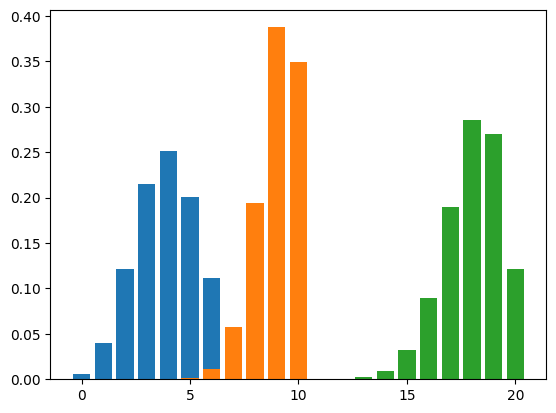

In [13]:
# Grafiquemos binomiales con distintos valores de los parámetros
# Para esto usamos el método pmf del objeto que representa la distribución
def graficar_binom(n, p, **kwargs): # n: nro de ensayos, p: probabilidad de exito
  xs = np.arange(0, n+1)
  binomial = st.binom(n, p)
  ys = binomial.pmf(xs) # pmf viene de probability mass functions, que hace referencia a las funciones de prob discretas
  # print(ys)
  """
  Tener en cuenta que si vemos con el print lo que nos devuelve la distribucion binomial evaluada para los distintos r (es decir, los 
  posibles valores que puede tomar la variable aleatoria en cuestion) para obtener la probabilidad en cada uno de esos valores, vamos 
  a ver que tenemos valores con este formato, por ej: 6.04234e-03
  Tener en cuenta que en Python 1e significa 10. Y si tenemos como en el caso anterior e-03, es en realidad 10^-3.
  Entonces basicamente seria: 6.04234 * 10^-3, lo que nos da 0.0064234 como probabilidad (lo que es correcto ya que es menor a 1)
  """
  plt.bar(xs, ys, **kwargs)

graficar_binom(10, 0.4)
graficar_binom(10, 0.9)
graficar_binom(20, 0.9)

"\nEn el grafico final, que es el de mayor cantidad de muestras, veremos que justamente cuanto mayor sea la cantidad de dichas \nmuestras, mas podremos acercarnos 'a mano' al primer grafico de arriba, que es el que tiene la probabilidad y el n trabajados en este caso\n"

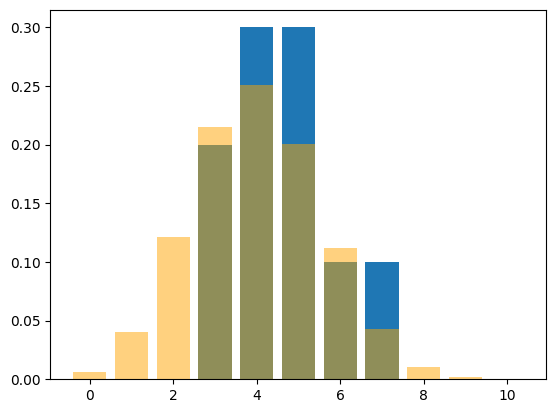

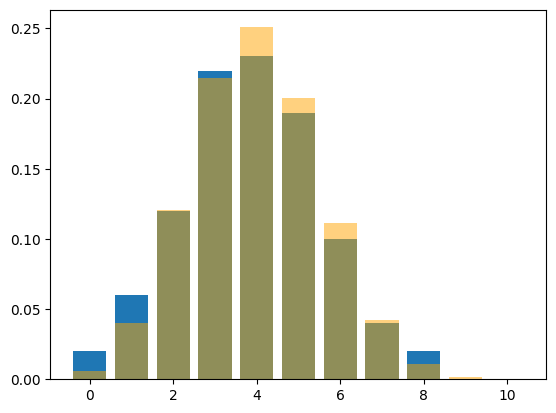

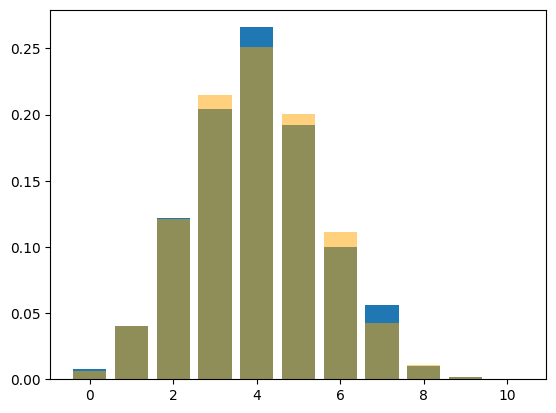

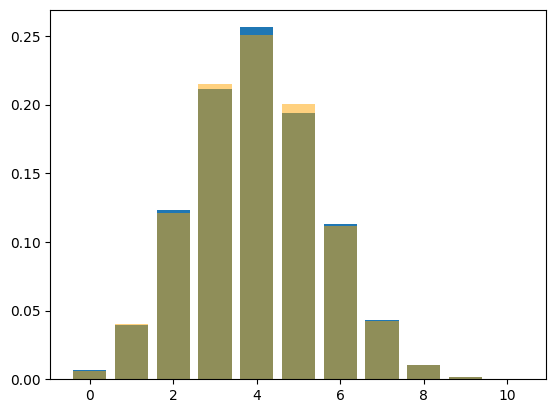

In [14]:
# Ahora sampleemos la distribución con una elección de los parámetros
# y armemos el histograma (normalizado). Nos debería dar parecido
# al gráfico teórico

def samplear_binom(n, p, n_samples):
  binomial = st.binom(n, p)
  samples = binomial.rvs(size=n_samples) # me devuelve n_samples muestras de numeros aleatorios entre 0 y 9
  #print(samples)
  return samples

def realizar_histograma(muestras, normalizado=True, **kwargs):
  valores_posibles = np.arange(0, max(muestras) + 1)
  conteos = np.bincount(muestras, minlength = len(valores_posibles))
  if normalizado:
    conteos = conteos / len(muestras)
  plt.bar(valores_posibles, conteos, **kwargs)

# Veamos cómo el histograma se va pareciendo más a la distribución teórica
# a medida que aumenta el número de muestras

for n_samples in [10, 100, 500, 10000]:
  muestras = samplear_binom(10, 0.4, n_samples)
  plt.figure()
  realizar_histograma(muestras)
  graficar_binom(10, 0.4, color='orange', alpha=0.5)

"""
En el grafico final, que es el de mayor cantidad de muestras, veremos que justamente cuanto mayor sea la cantidad de dichas 
muestras, mas podremos acercarnos 'a mano' al primer grafico de arriba, que es el que tiene la probabilidad y el n trabajados en este caso
"""

# Probabilidad condicional

Hasta ahora pudimos formalizar situaciones del mundo real en las cuales distintos eventos de interés no *dependen* unos de otros. Por ejemplo, al tirar dos dados, *conocer* el valor que adopta uno de los dos no cambia nuestras predicciones sobre el valor del otro. Son fenómenos descorrelacionados, o más precisamente hablando, son variables aleatorias independientes.

Pero es muy fácil comenzar a hacernos preguntas que exceden las herramientas que desarrollamos hasta ahora. Por ejemplo, supongamos que tiro dos dados A y B ($X_A, X_B \sim U(1,\dots,6)$) y escondo el resultado, pero les digo que la suma ($Y = X_A + X_B$) de los dos números es $8$. ¿Cuál debería ser su predicción sobre la probabilidad de que para el dado A haya salido un $2$? ¿Y si les digo que la suma dio $9$? Algo es seguro: la predicción tiene que cambiar de alguna manera según la información que les doy, ya que si la suma es $9$, es absolutamente imposible que el dado A sea un $2$ (habría que sumarle $7$), mientras que si es $8$ sí hay alguna posibilidad, pero quizá menor que si la suma fuera $7$.

Para responder estas preguntas debemos introducir la noción de **probabilidad condicional**, tanto para eventos como para variables aleatorias.

**Definición.** Sea $\Omega$ un espacio muestral, $p$ una medida de probabilidad sobre $\Omega$, y sea $E \subseteq \Omega$ un evento con probabilidad no nula ($p(E) \neq 0$). La *probabilidad condicional dado $E$* es una nueva medida de probabilidad $p(otro evento|E)$ definida según

$$ p(V|E) = \frac{p(E \cap V)}{p(E)}. $$

Traducido: la probabilidad condicional tiene esta fórmula que nos sirve para saber cuál es la probabilidad de que un evento $V$ ocurra sabiendo que ya previamente ocurrió el evento $E$.

Noten que hay que pedir que $p(E) \neq 0$ para que esta fórmula tenga sentido.

Veamos por qué tiene sentido esta fórmula con el ejemplo de los dados. La idea es esta: dado que pasó $E$ (la suma de los dados es $8$), quiero saber la probabilidad de $V$ (el dado A es un $2$). Para eso, tengo que mirar todas las situaciones posibles (todos los $\omega \in \Omega$) en las que haya pasado $E$. En nuestro caso, esas situaciones son $(2, 6), (3, 5), (4, 4), (5, 3)$ y $(6, 2)$. Ahora, *de esas* situaciones, miro aquellas en las que *además* pasó $V$. Esto corresponde a tomar la intersección $E \cap V$. En nuestro caso, hay una única situación y es $\omega = (2, 6)$. Ahora tenemos que preguntarnos por la probabilidad de $E \cap V = \{(2, 6)\}$, pero no sobre todas las situaciones posibles del mundo, sino solo sobre las situaciones en las que ocurrió $E$. Esto es una regla de tres simple: si ahora la probabilidad de $E$ la tomamos, temporariamente, como igual a $1$, ya que nuestro mundo de posibilidades se redujo a las opciones que nos da ese evento que ya ocurrió, cuál es la probabilidad correspondiente para $E \cap V$?

\begin{align}
p(E)& \quad \underline{\hspace{3cm}}&1 \\
p(E \cap V)& \quad \underline{\hspace{3cm}}&?
\end{align}

Pues claro, la respuesta es $\frac{p(E \cap V)}{p(E)}$ que es la fórmula de arriba.

En nuestro caso, como la probabilidad de cada $\omega$ es la misma, la probabilidad de cada evento $W$ es igual al número de elementos de $W$, que llamamos $\# W$, dividido por el tamaño del espacio muestral, $N$. Entonces podemos calcular el resultado así:

$$p(V|E) = \frac{p(E \cap V)}{p(E)} = \frac{\#(E \cap V) / N}{\# E / N} = \frac{\#(E \cap V)}{\# E}$$

Es decir, simplemente contamos qué fracción de las veces que pasó $E$, también ocurrió $V$. O sea que la probabilidad condicional de que haya salido un $2$ en el dado A dado que la suma de los dos dados es $8$, es igual a $1/5$.
Nos da este resultado porque recordemos: tenemos en total de nuestro espacio muestral inicial $W$ 36 opciones de pares, que sería el tamaño $N$ de dicho espacio. Sabemos que hay 5 posibilidades de para que la suma del par de dados de 8. Ahí tenemos entonces 5/36 en el denominador. Por otra parte, de esas 5 posibilidades de que la suma de los dos dados de 8, solo hay 1 caso en el que el primer dado $A$ es 2. Entonces así tenemos 1/36.
O sea:
$$\frac{1 / 36}{5 / 36} = \frac{1}{5}$$

## Independencia

En este ejemplo de los dados, $p(V) \neq p(V | E)$. Esto nos dice que los eventos no son independientes, pues saber que uno ocurrió cambia la probabilidad de que el otro haya ocurrido. Decimos que dos eventos $A$ y $B$ son *independientes* si $P(A|B) = P(A)$, ya que $A$ ni se "mosquearía" si $B$ ocurre primero, es decir, no le influye. En ese caso ocurre también que $p(B|A) = p(B)$ y que

$$p(A \cap B) = p(A) p(B).$$

Decimos que la probabilidad se *factoriza* como el producto de las probabilidades. 

Si $A$ y $B$ no fueran independientes, en general tenemos la factorización

$$p(A \cap B) = p(A|B) p(B)$$

que no es más que reordenar la definición. Esta fórmula es muy útil: a veces lo que queremos saber es $p(A \cap B)$, la probabilidad de que hayan ocurrido $A$ y $B$ al mismo tiempo, y lo que sabemos es la probabilidad de que ocurra $B$, y la probabilidad de que ocurra $A$ dado que ocurrió $B$.


## El Teorema de Bayes

Les voy a decir algo sorprendente: a esta altura, si entendieron todo lo que vimos hasta ahora de probabilidad condicional, ya saben el Teorema de Bayes. Enunciar el teorema no es más que reordenar algunas ecuaciones que ya conocemos.

Por definición, tenemos la probabilidad condicional $p(A|B) = p(A \cap B) / p(B)$. Reordenando como antes, tenemos $p(A \cap B) = p(A|B) p(B)$. Pero de la misma forma, porque $A \cap B = B \cap A$, podemos obtener

$$p(A \cap B) = p(B|A) p(B)$$

Igualando los términos del lado derecho y reordenando, obtenemos la fórmula conocida como **Teorema de Bayes**:

$$p(B|A) = \frac{p(A|B) p(B)}{p(A)}$$

Fíjense que la fórmula nos permite invertir los roles de $A$ y $B$. $p(A|B)$ y $p(B|A)$ no son lo mismo numéricamente, y conceptualmente representan cosas totalmente diferentes. Veámoslo con un ejemplo.

### Ejemplo de Bayes

El teorema de Bayes nos permite empezar a calcular cosas que pueden chocar con nuestra intuición.

En este ejemplo, consideremos una enfermedad rara, con una prevalencia del $0,5\%$ sobre la población, es decir que hay una probabilidad de $0,005$ de que una persona tenga la enfermedad. Muchas veces esta enfermedad pasa desapercibida hasta que se realiza un chequeo. Existe un test para esta enfermedad que es muy bueno pero, como cualquier test, no es perfecto. El test tiene una probabilidad $v_+ = 0,97$ de dar un *verdadero positivo*, es decir, da positivo cuando la persona realmente tiene la enfermedad un $97\%$ de las veces (tomar el "cuando" como un "si" condicional). Y por lo tanto, da un *falso negativo* el $3\%$ de las veces, que son el resto de las veces que el paciente realmente está enfermo. Análogamente, tiene probabilidad $f_+ = 0,004$ de dar un *falso positivo*, que es cuando el paciente no está enfermo pero el test dice que sí (y por lo tanto, da un *verdadero negativo* el $99,6\%$ de las veces).

Estos números parecen bastante buenos, ¿no? Bueno, supongamos que voy a un chequeo de rutina, me hacen el test y me da positivo. ¿Cuál es la probabilidad de que esté realmente enfermo?

Posiblemente, su intuición les diga que esta probabilidad debería ser muy alta. Pero esa intuición es errada. Para entenderlo formalicemos el problema con nuestra nueva herramienta. Llamemos $E$ a "tener la enfermedad" y $A$ a "el test dio positivo". La *negación* de $E$ es "no tener la enfermedad" y la escribimos $\lnot E$ (es la notación que se usa en lógica). La negación de $A$ es "el test dio negativo" (porque si no da positivo, da negativo) y la escribimos $\lnot A$.

Nuestros datos entonces son
\begin{align}
p(A|E) &= v_+ = 0,97 \\
p(A| \lnot E) &= f_+ = 0,004
\end{align}

y lo que queremos averiguar es $p(E|A)$. Repasen las definiciones de $A$, $E$, $v_+$ y $f_+$ hasta convencerse de que esta es la situación que planteamos.

Nuestra intuición nos dice que $p(E|A)$ tiene que ser alta, porque $p(A|E)$ lo es. Pero en realidad son dos cosas distintas. Esta confusión es tan común que [hasta tiene página de Wikipedia](https://en.wikipedia.org/wiki/Confusion_of_the_inverse) (en inglés).

Veamos cuál es la verdadera respuesta con el Teorema de Bayes, usando la fórmula:

$$p(A|E) = \frac{p(E|A) p(E)}{p(A)}$$

Para eso necesitamos dos probabilidades más: $p(E)$ y $p(A)$. La primera ya la tenemos: es la prevalencia de la enfermedad en la población, $p(E) = 0,005$. En cambio la segunda, el *denominador de Bayes*, no nos la dieron explícitamente, sino que nos da $p(A|E)$ y $p(A| \lnot E)$. Con esto nos va a alcanzar para calcular $p(A)$ gracias al Teorema de la Descomposición.

El **Teorema de la Descomposición** nos dice que si tenemos una *partición* del espacio muestral, es decir eventos $E_1, E_2, \dots E_k$ que son disjuntos y tales que su unión es igual a $\Omega$, entonces podemos usarlos para descomponer la probabilidad de nuestro evento $A$:

$$ p(A) = p(A \cap E_1) + p(A \cap E_2) + \dots p(A \cap E_k)$$

![teo-descomposición](https://jeremykun.files.wordpress.com/2013/03/total-probability.png)

Pero recordemos que más arriba vimos que podemos escribir $p(A \cap E_i) = p(A|E_i) p(E_i)$, con lo cual la descomposición nos queda 

$$ p(A) = p(A | E_1) p(E_1) + p(A | E_2) p(E_2) + \dots p(A | E_k) p(E_k) $$

En nuestro caso, solo necesitamos aplicarlo al caso en que la partición tiene dos partes, $E$ y $\lnot E$, ya que puede ser que el resultado sea positivo ($A$) teniendo la enfermedad ($E$), o puede ser que el resultado de positivo ($A$) no teniendo la enfermedad ($\lnot E$) (¿Ven por qué eso es una partición de $\Omega$?). Esto nos permite reescribir el denominador de Bayes, y las fórmula nos queda así:

$$p(A) = p(A \cap E) + p(A \cap \lnot E) = p(A|E) p(E) + p(A| \lnot E) p(\lnot E)$$

$$p(A|E) = \frac{p(E|A) p(E)}{p(A|E) p(E) + p(A| \lnot E) p(\lnot E)}$$

Reemplazando los valores obtenemos nuestro resultado deseado:

In [15]:
p_A_dado_E = 0.97
p_A_dado_notE = 0.004
p_E = 0.005
p_notE = 1 - p_E

p_A = p_A_dado_E * p_E + p_A_dado_notE * p_notE

p_E_dado_A = p_A_dado_E * p_E / p_A

print("La probabilidad de estar enfermo dado que el test dio positivo es {}".format(p_E_dado_A))

La probabilidad de estar enfermo dado que el test dio positivo es 0.5492638731596828


Como ven, la probabilidad resultó relativamente baja. Esto se debe a que la enfermedad es muy rara ($p(E)$ es muy chico).

# El caso continuo y la distribución normal

Llamamos "caso continuo" al caso en que nuestro espacio muestral contiene números reales. Por ejemplo puede ser $\Omega = [0, +\infty)$, todos los reales positivos. Este sería el caso si por ejemplo queremos modelizar los posibles tiempos de espera entre dos sucesos.

Para simplificar las cosas vamos a pensar siempre en el caso $\Omega = \mathbb{R}$, todos los números reales, que es el más importante.

En el caso continuo, hay una serie de dificultades técnicas que lamentablemente no son fáciles de explicar. Por ejemplo, ya no es cierto que cualquier subconjunto $E \subseteq \Omega$ constituye un evento válido. Esto se debe a que hay subconjuntos de $\mathbb{R}$ que son muy raros y contraintuitivos, que no tienen un "tamaño" bien definido. Pero mientras que nuestros subconjuntos de $\mathbb{R}$ sean cosas construidas como uniones e intersecciones de intervalos $(a, b)$ no vamos a tener problemas.

Si bien hay detalles técnicos (como el que acabamos de mencionar) que no nos afectan en la práctica cotidiana del análisis de datos y la estadística, sí hay diferencias importantes a tener en cuenta, y esas diferencias está en cómo se definen las distribuciones de probabilidad y cómo se manipulan.

En el caso discreto, habíamos dicho que una distribución de probabilidad era lo que a veces se llama una *point mass function* o PMF: a cada valor posible le asigna su probabilidad. Esto tenía todo el sentido del mundo porque a partir de esta información podíamos luego recuperar la probabilidad de cualquier evento posible, sumando las probabilidades de los valores que correspondieran. Ahora, en vez de eso, vamos a definir las distribuciones de probabilidad como PDF o *densidades de probabilidad*.

La matemática de las probabilidades continuas es un poco más complicada y va a requerir que reemplacemos las sumas por integrales. Por ejemplo, en vez de pedir la condición de normalización $ \sum_{x \in S} f(x) = 1$ para una PMF $f$, si ahora $f$ es una densidad, tendremos que pedir

$$ \int_{-\infty}^{\infty} f(x) dx = 1 $$

que es la condición análoga, pero donde ahora tenemos que sumar sobre una cantidad infinita no numerable de valores posibles para $x$, que es lo mismo que decir "integrar".

Vayamos introduciendo a la estrella de la noche, la distribución continua más importante de todas: la **distribución normal** (o gaussiana), que depende de dos parámetros $\mu$ y $\sigma$ y llamamos $\mathcal{N}(\mu, \sigma)$.

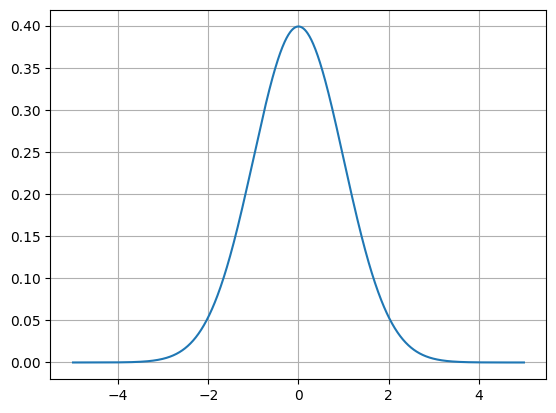

In [16]:
mu = 0
sigma = 1
normal = st.norm(loc=mu, scale=sigma)
# Grafiquemos esta distribución cerca del 0
xs = np.linspace(-5, 5, 1000)
ys = normal.pdf(xs)
fig, ax = plt.subplots(facecolor=(1, 1, 1))
ax.plot(xs, ys)
ax.grid(True)

Sea $X \sim \mathcal{N}(\mu, \sigma)$ nuestra v.a. normal. La función $f$ es una "densidad" porque **ya no es cierto que $f(x)$ sea la probabilidad del evento $X = x$**. De hecho, va a pasar que $\text{Pr}(X = x) = 0$, porque como son tantos valores posibles para $X$, la probabilidad de cada uno de ellos es infinitesimalmente pequeña (esta es una forma de pensarlo, si no les convence simplemente sigan de largo). En cambio lo que sí es cierto (y podemos tomar casi como la definición de una densidad de probabilidad) es que 

$$ \text{Pr}(a \leq X \leq b) = \int_a^b f(x) dx. $$

En palabras: si quiero saber la probabilidad de que $X$ caiga en el intervalo $(a, b)$, me fijo cuánto vale la integral de $f$ entre $a$ y $b$, o lo que es lo mismo, el área bajo la curva entre $a$ y $b$:

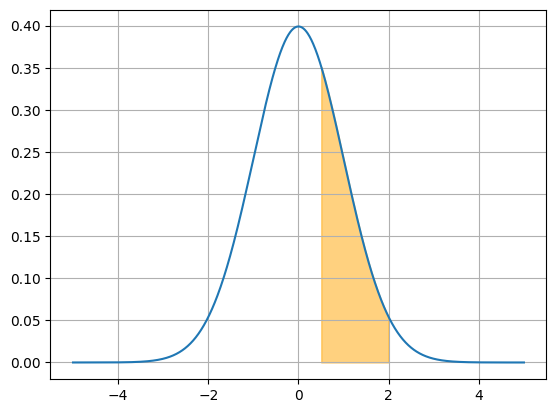

In [17]:
a = 0.5
b = 2
ax.fill_between(xs, ys, where=(a <= xs)&(xs <= b), color='orange', alpha=0.5)
fig

Si queremos pedirle a Python que nos haga la cuenta, usamos el método `cdf` ("Cumulative Distribution Function") del objeto que representa a la distribución. `normal.cdf(t)` nos da la probabilidad acumulada hasta el valor `t`, o sea, el área bajo la curva que queda a la izquierda de `xt`, o matemáticamente, $\int_{- \infty}^t f(x) dx$. Se sigue entonces que podemos calcular $\int_a^b f(x) dx$ como $\int_{- \infty}^b f(x) dx - \int_{- \infty}^a f(x) dx$, o lo que es lo mismo, `normal.cdf(b) - normal.cdf(a)`.

Supongamos que X está distribuida según una normal con mu=0 y sigma=1.      
 Entonces la probabilidad de que X esté entre a=0.5 y b=2 es 0.29


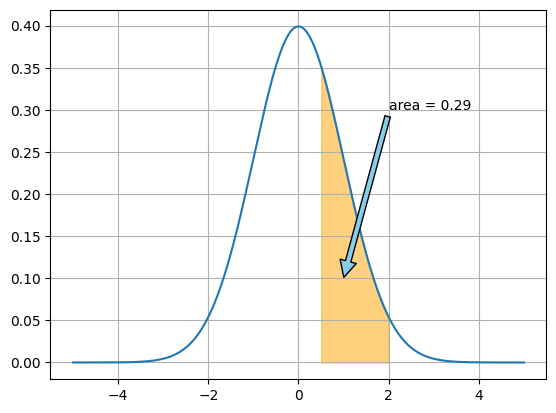

In [18]:
prob = normal.cdf(b) - normal.cdf(a)
# Agreguemos esta info a nuestro gráfico de antes
ax.annotate('area = {0:.2g}'.format(prob), xy =(1, 0.1),
                xytext =(2, 0.3),
                arrowprops = dict(facecolor ='skyblue',
                                  shrink = 0.005))
print("Supongamos que X está distribuida según una normal con mu={} y sigma={}.\
      \n Entonces la probabilidad de que X esté entre a={} y b={} es {:.2g}".format(mu, sigma, a, b, prob))
fig

El parámetro $\mu$ controla donde está centrada la distribución, mientras que $\sigma$ controla qué tan ancha es la campana (pueden modificar estos valores en el código de arriba y graficar cómo se ve el resultado).

**Ejercicio de lectura activa (5)**: Si $f$ es la distribución normal con $\mu = 0$ y $\sigma = 0.01$, ¿Cuál es el valor de $f(0)$? ¿Hay algo raro en esto? ¿Por qué no es un problema?

<details>
<summary>Pueden ver la respuesta haciendo click acá.</summary>

Ejecutando `st.norm(loc=0, scale=0.01).pdf(0)` obtenemos `39.89422804014327`. Podría hacerles ruido porque es un número mayor a $1$. Pero eso no es un problema, porque $f(x)$ no es la probabilidad de que $X=x$. Lo que está pasando es que, como $\sigma$ es bastante chico, toda la campana se hace angosta y entonces para que el área siga siendo $1$, tiene que hacerse más alta. Si $\sigma$ es más chico, la probabilidad se concentra más alrededor de $\mu$.

</details>

Podemos interpretar $f(x)$ como indicando qué tanto más probable es que $X$ esté cerca de $x$ que de algún otro valor. Es decir, si $f(x_1)$ es más grande que $f(x_2)$, eso nos está diciendo que es *más* probable que $X$ esté cerca de $x_1$ que de $x_2$.

***

# Medidas de tendencia central y de variabilidad

La distribución normal nos viene como anillo al dedo para nuestro próximo tema: ¿Cómo *resumimos* la información sobre una variable aleatoria?

Con bastante frecuencia, tener la información completa sobre la distribución de probabilidad de una variable aleatoria es más que lo que necesitamos, y también mucho más de lo que podemos conseguir.

Puede ser más que lo que necesitamos porque muchas veces lo que queremos saber es *más o menos qué valor tiene*, y *qué tan lejos de ese valor puede llegar a fluctuar*. Desde el punto de vista de qué información podemos conseguir realmente sobre el mundo (punto de vista que nos mete en la Estadística propiamente dicha), es mucho más fácil (o sea, requiere menos datos) realizar una buena estimación un par de números que caractericen a grandes rasgos a nuestra variable, mientras que estimar su distribución de probabilidad en su totalidad puede ser una tarea extremadamente complicada y requerir muchos más datos.

Intuitivamente, en el caso de la distribución normal parece ser que la respuesta a esas dos preguntas (qué valor tiende a tener en general la variable, y qué tanto puede desviarse de él) nos las dan los parámetros $\mu$ y $\sigma$ respectivamente, y eso es efectivamente así, pero la pregunta nos la podemos hacer sobre cualquier distribución. Necesitamos entonces una definición rigurosa de una medida de tendencia central, que en el caso de la distribución normal va a ser $\mu$, y una medida de la variabilidad de la v.a., que en el caso de la normal va a ser $\sigma$.

### Nunca pierdas la Esperanza

**Definición**. Definamos la *esperanza* de una variable aleatoria $X$.
* En el caso $X$ discreta, con valores en un conjunto $S$ (que puede ser finito, o infinito numerable como $\mathbb{N}$), si $p_X$ es su PMF, la esperanza de $X$ es
$$ \mathbb{E}(X) = \sum_{x \in S} x \, p_X(x) $$
Por ejemplo si $X \sim \text{Binom}(n, p)$ (la dist. binomial), haciendo la cuenta se ve que
$$\mathbb{E}(X) = \sum_{k = 0}^n k \, p_X(k) = np.$$
Esta cuenta no es más que el "promedio" de todos los valores posibles de $X$, donde cada valor va pesado por qué tan probable es. La razón por la que el nombre es "esperanza" en vez de "promedio" es que reservamos "promedio" para hablar de la cuenta análoga realizada con *datos* (en un rato veremos un teorema importante que dice que que el promedio muestral aproxima la esperanza de la distribución).

* En el caso $X$ continua, con PDF $f_X$, la esperanza de $X$ es
$$ \mathbb{E}(X) = \int_{- \infty}^{+ \infty} x \, f_X(x) dx$$

Por ejemplo, para $X \sim \mathcal{N}(\mu, \sigma)$, haciendo la cuenta nos da (sorpresa sorpresa) $\mathbb{E}(X) = \mu$.

A la esperanza también la llamamos "media" (*mean*, en inglés), y también a veces "valor esperado" o "valor de expectación" (aunque eso último es un anglicismo). También usamos la notación $\mu_X$ como sinónimo de $\mathbb{E}(X)$, incluso si $X$ no es gaussiana.

### Otras medidas de tendencia central: moda y mediana

Cuando queremos resumir la tendencia central de una distribución, no siempre nos va a servir la esperanza. Consideren esta distribución de ejemplo, que me armo sampleando de dos gaussianas distintas, según la tirada de una moneda. (Esto es un ejemplo de un modelo probabilístico un poco más sofisticado. Vendría a ser una versión de juguete de modelos gaussianos que se usan para *topic modelling*). La grafico sampleando una gran cantidad de muestras y generando un histograma (de hecho esto muestra la versatilidad del método de Monte Carlo).


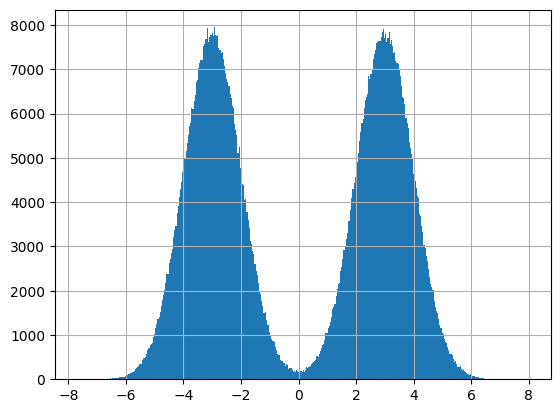

In [19]:
def samplear_modelo_bimodal(n_samples):
    tiradas_moneda = st.bernoulli(0.5).rvs(size=n_samples)
    samples_1 = st.norm(loc=-3, scale=1).rvs(size=n_samples)
    samples_2 = st.norm(loc=+3, scale=1).rvs(size=n_samples)
    # Si la moneda sale 1, ponemos sample_1. Si sale 0, ponemos sample_2
    samples = samples_1 * tiradas_moneda + samples_2 * (1 - tiradas_moneda)
    return samples

samples = samplear_modelo_bimodal(1000000)
_ = plt.hist(samples, bins=400)
plt.grid(True)

Esta distribución, que es una combinación de dos gaussianas con distinto $\mu$, es simétrica alrededor del $0$, y por lo tanto, la esperanza va a ser $0$. Sin embargo, está claro que $0$ está muy lejos de ser un valor representativo de $X$, es decir, el valor con mayor probabilidad. En este tipo de situaciones podemos usar otra medida, la *moda* de la distribución, que se define como su valor más probable (el "pico" del gráfico). Al modelo de arriba lo llamé "modelo bimodal" precisamente porque no solo la moda no coincide con la esperanza, sino que *ni siquiera hay una sola moda*, sino que hay dos.

Incluso en distribuciones unimodales, la moda puede no coincidir con la esperanza. Esto pasa por ejemplo con la siguiente distribución (el nombre no importa, pero se llama "distribución chi cuadrado con 4 grados de libertad"):

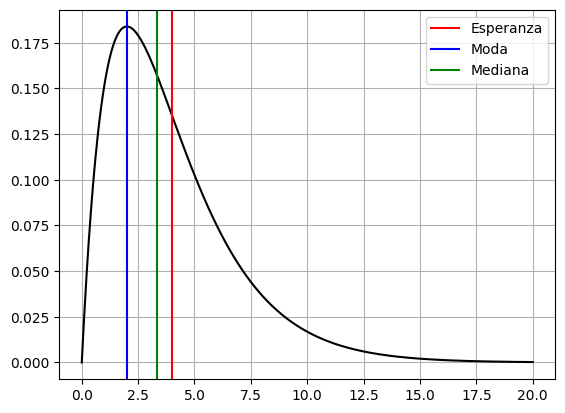

In [20]:
def grafico_chi2():
    distribucion = st.chi2(4)
    xs = np.linspace(0, 20, 1000)
    ys = distribucion.pdf(xs)
    mean = distribucion.mean() # ya nos lo da scipy.stats
    # calculamos la moda con scipy.optimize.minimize
    mode = minimize(lambda x: -distribucion.pdf(x), 0).x
    median = distribucion.median()
    plt.plot(xs, ys, color='black')
    plt.axvline(mean, color='red', label='Esperanza')
    plt.axvline(mode, color='blue', label='Moda')
    plt.axvline(median, color='green', label='Mediana')
    plt.grid(True)
    plt.legend()
grafico_chi2()

En el gráfico indicamos la esperanza y la moda, y me tomé la libertad de ya ir incluyendo la tercera medida de tendencia central más conocida: la *mediana* de la distribución, que se define como el punto que deja a la izquierda el $50\%$ de la probabilidad (y por lo tanto, otro $50\%$ de probabilidad a la derecha): es decir que si $m$ es la mediana de $X$,

$$ \int_{- \infty}^m f_X(x) dx =  \int^{+ \infty}_m f_X(x) dx = 0,5. $$

Como puede verse en el gráfico, los tres números en este caso son diferentes. En comparación, para la gaussiana los tres números son iguales. La diferencia está en que esta distribución no es simétrica. Cuando hagamos estadística o análisis de datos, saber cuál de todas las medidas usar dependerá de nuestro conocimiento del proceso que genera los datos.

## Varianza y desviación estándar

A continuación, veamos la principal medida de variabilidad o *dispersión* de una distribución.

**Definición.** La *varianza* de una variable aleatoria $X$ se define así:

* Caso discreto:

$$ \text{Var}(X) = \sum_{x=0}^n (x - \mu_X)^2 p_X(x) $$

Por ejemplo si $X \sim \text{Binom}(n, p)$, $\text{Var}(X) = n p (1-p)$.

* Caso continuo:

$$ \text{Var}(X) = \int_{- \infty}^{+ \infty} (x - \mu_X)^2 f_X(x) dx$$

Por ejemplo si $X \sim \mathcal{N}(\mu, \sigma)$, $\text{Var}(X) = \sigma^2$. Se ve de la definición que la varianza es una especie de "desviación cuadrática media" respecto de la esperanza.

En general, para cualquier variable aleatoria (aunque no sea gaussiana), definimos su *desviación estándar* como $\sigma_X = \sqrt{\text{Var}(X)}$. En el caso de una gaussiana con parámetro $\sigma$, recuperamos $\sigma_X = \sigma$. Al tomar raíz cuadrada, $\sigma_X$ tiene las mismas "unidades" que $X$. Por ejemplo si $X$ es la estatura *en centímetros* de un individuo en una población de personas (de forma que la distribución de alturas es la distribución de probabilidad de $X$), $\sigma_X$ es una medida *en centímetros* de cuánto suele variar la estatura de un individuo típico respecto de la esperanza $\mu_X$. Si usáramos la varianza, esa medida de dispersión estaría en *centímetros cuadrados*, lo cual no es tan fácilmente interpretable.

***

La varianza mide qué tan lejos puede "irse" $X$ respecto de su esperanza, y esto puede cuantificarse con precisión preguntándonos cuál es la probabilidad de que $X$ caiga dentro del intervalo $(\mu_X - \sigma_X, \mu + \sigma_X)$, o lo que es lo mismo, la probabilidad de que $|X-\mu_X | \leq \sigma_X$. Un caso muy importante es el de la distribución normal. En este caso, vale que siempre, para cualquier valor de los parámetros $\mu$ y $\sigma$ de la distribución,

$$ \text{Pr}(|X - \mu| \leq \sigma) \simeq 0.68$$

Es decir que, por ejemplo, si la distribución de estaturas de individuos en una población fuera gaussiana, aproximadamente el $68\%$ de la población tendría una altura mayor a $\mu - \sigma$ y menor a $\mu + \sigma$. Verifiquémoslo en Python:

In [21]:
mu = 5
sigma = 2.5
dist = st.norm(loc=mu, scale=sigma)
# probabilidad contenida entre mu-sigma y mu+sigma
z = dist.cdf(mu + sigma) - dist.cdf(mu - sigma)
print("La probabilidad contenida entre mu-sigma y mu+sigma es {:.2g}.".format(z))

La probabilidad contenida entre mu-sigma y mu+sigma es 0.68.


### Distribución normal estándar

Antes de pasar al siguiente tema, un último comentario: si $X \sim \mathcal{N}(\mu, \sigma)$, entonces puede verse matemáticamente que definiendo $\tilde{X} = (X - \mu)/\sigma$, $\tilde{X} \sim \mathcal{N}(0, 1)$. Es decir, restando la media y dividiendo por la dispersión, podemos *estandarizar* cualquier variable aleatoria normal para llevarla a una variable aleatoria con esperanza $0$ y desviación estándar $1$. Esto se usa muchas veces dado que si es necesario consultar alguna propiedad de la distribución normal, estas suelen estar expresadas para la distribución normal estándar $\mathcal{N}(0, 1)$.

***

# Distribuciones multivariadas

Volvamos al ejemplo de dos dados. Como vimos, podíamos formalizarlo con dos variables aleatorias $X$, $Y$ (cada dado es una variable con su propia distribución) distribuidas según $U(1,\dots 6)$. Sin embargo, el espacio muestral no era $\{1, 2, 3, 4, 5, 6\}$, sino $\{1, \dots, 6\} \times \{1, \dots, 6\} = \{(1, 1), (1, 2), \dots, (6, 6)\}$. Es decir, si bien $X$ e $Y$ tienen la misma distribución sobre $\{1, 2, 3, 4, 5, 6\}$, entre las dos determinan una distribución sobre el producto $\{1, \dots, 6\} \times \{1, \dots, 6\}$, que vendría a ser el producto de los espacios muestrales individuales.

Si esto no fuera así, y el espacio muestral fuera $\{1, 2, 3, 4, 5, 6\}$, entonces $X$ y $Y$ tendrían siempre el mismo valor (si una es $3$, la otra también es $3$, etcétera). Sería como definir $Y$ según $Y = X$.

Podemos pensar que $(X, Y)$ es una *variable aleatoria bidimensional*, con una *distribución de probabilidad conjunta* $p_{XY}$, que a cada par $(i, j)$ le asigna la probabilidad $p_{XY}(x, y) = \text{Pr}(X = x, Y = y)$. Esto es una PMF porque las variables son discretas. Para el caso de $X, Y$ variables continuas, vamos a tener una *densidad de probabilidad conjunta* $f_{XY}$.

Una distribución de probabilidad conjunta muy importante es la generalización a varias variables de la distribución normal, que se llama *distribución multinormal* (o *normal multivariada*). Se puede definir para cualquier dimensión, pero nosotros nos vamos a quedar con el caso de dos dimensiones, con variables $X, Y$.

Para especificar una distribución multinormal sobre la variable bidimensional $(X, Y)$, necesitaremos especificar una media tanto para $X$ como para $Y$, $\mu_X$ y $\mu_Y$, así como dispersiones $\sigma_X$ y $\sigma_Y$. Sin embargo, esto no especifica por completo la distribución multinormal. La razón es que *en una distribución de probabilidad conjunta, las distintas variables pueden estar correlacionadas*, y nuestra distribución nos tiene que decir si lo están o no, y si lo están, de qué manera. Para eso necesitamos un parámetro más, $\rho $ (rho), que va entre $-1$ y $1$ y controla qué tanto una variable depende de la otra.

En verdad, tanto $\sigma_X, \sigma_Y$ como $\rho$ se organizan en la *matriz de covarianza* (covarianza vendría a ser cómo varía una variable cuando la otra varía). La matriz de covarianza es por ejemplo lo que debemos pasar como parámetro a `scipy` para construir el objeto que representa a la distribución, y que nos permitiría generalizar a más dimensiones. La *covarianza* entre dos variables aleatorias puede definirse como $\text{Cov}(X, Y) = \mathbb{E}(X Y) - \mathbb{E}(X) \mathbb{E}(Y)$. Se tiene de hecho que $\text{Cov}(X, X) = \text{Var}(X)$, luego la matriz de $2 \times 2$ que tiene en la entrada $(i, j)$ la covarianza entre las variables $i$-ésima y $j$-ésima es

$$ V = \begin{pmatrix}
    \text{Var}(X) & \text{Cov}(X, Y) \\
    \text{Cov}(Y, X) & \text{Var}(Y)
\end{pmatrix}$$

Esta matriz siempre es simétrica, es decir que $\text{Cov}(X, Y) = \text{Cov}(Y, X)$.

En el caso binormal que estamos analizando, con parámetros $\mu_X, \mu_Y, \sigma_X, \sigma_Y, \rho$, puede calcularse que la matriz de covarianza resulta ser

$$ V = \begin{pmatrix}
    \sigma_X^2 &  \rho \sigma_X \sigma_Y \\
    \rho \sigma_X \sigma_Y & \sigma_Y^2
\end{pmatrix}$$

Grafiquemos la distribución binormal para distintos valores de $\rho$.

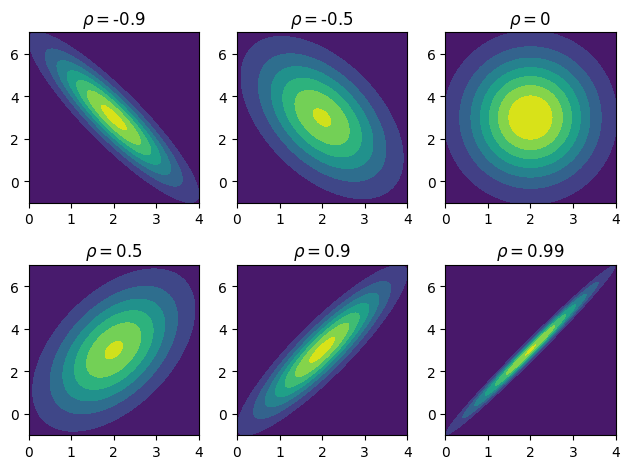

In [28]:
def graficar_binormal(mu_X, mu_Y, sigma_X, sigma_Y, rho, ax=None):
    cov_matrix = [[sigma_X**2, sigma_X * sigma_Y * rho],
                  [sigma_X * sigma_Y * rho, sigma_Y**2]]
    """
    el constructor que devuelve la distribucion multinormalnormal (en este caso, para 2 variables aleatorias con distribucion normal ambas) 
    pide por un lado un vector/lista de medias (mu) de cada variable aleatoria, y por el otro la matriz de covarianza construida arriba 
    segun la formula vista en la parte teorica
    """
    dist = st.multivariate_normal(mean = [mu_X, mu_Y], cov = cov_matrix)
    
    xs, ys = np.meshgrid(np.linspace(mu_X - sigma_X * 2,
                                     mu_X + sigma_X * 2, 1000),
                         np.linspace(mu_Y - sigma_Y * 2,
                                     mu_Y + sigma_Y * 2, 1000))
    pos = np.dstack((xs, ys))
    zs = dist.pdf(pos)
    if ax is None:
        fig, ax = plt.subplots()
    ax.contourf(xs, ys, zs)

fig, axes = plt.subplots(2, 3)
axes = axes.flatten()
rhos = [-0.9, -0.5, 0, 0.5, 0.9, 0.99]

"""
Nota: en este ejemplo con dos variables bi-normales, cuando rho es negativa y se acerca a -1, 
si una variable decrece la otra crece. En cambio, si rho es positivo y se acerca a 1, ambas crecen 
en la misma proporcion

Por otro lado, en este ejemplo, los graficos nos muestran curvas de nivel de una campana gaussiana 
que es la forma grafica que genera la distribucion de nuestras dos variables. Es como si fuera 
una campana de gauss en el espacio
"""

for i in range(6):
    graficar_binormal(2, 3, 1, 2, rhos[i], ax=axes[i])
    axes[i].set_title(r"$\rho =$"+"{}".format(rhos[i]))
fig.tight_layout()

## Marginalizción

Nuestro par $(X, Y)$ podría corresponder a temperatura y presión atmosférica. Está claro que está bien considerar una distribución conjunta para ambas variables dado que es esperable que estén correlacionadas; sin embargo, también es válido preguntarse por la distribución de temperaturas, *sin importar* cuál es el valor de presión. Fíjense que esto es distinto de preguntarse por la distribución de temperaturas para un valor fijo de la presión (eso sería una distribución condicional, que mencionaremos enseguida). En cambio, queremos "olvidarnos" de toda la información relativa a la presión. Este proceso de obtener una distribución para $X$ a partir de la distribución para $(X, Y)$ se denomina *marginalización*, y no es más que realizar un promedio sobre todos los valores posibles de la variable que queremos "olvidar", en este caso $X$. Veámoslo en el caso continuo: si $f_{XY}$ es nuestra densidad de probabilidad, entonces la densidad para $X$ sola se obtiene como

$$ f_X(x) = \int_{- \infty}^{+ \infty} f_{XY}(x, y) dy. $$

Visto sobre el gráfico de la distribución conjunta $f_{XY}$, marginalizar sobre la variable $Y$ puede pensarse como mirar la "sombra" que genera el gráfico sobre el plano $yz$.

<img src="https://upload.wikimedia.org/wikipedia/commons/8/8e/MultivariateNormal.png" alt="Marginales" width="500"/>

## Probabilidad condicional en el continuo

Dadas variables $(X, Y)$, la función densidad condicional de $X$ dado $Y$ se define como

$$ f_X(x | y) = f_X(x | Y=y) = \frac{f_{XY}(x, y)}{f_Y(y)} $$

donde el denominador, $f_Y(y)$, es la distribución marginal de $Y$. Cuando $X$ e $Y$ son independientes, se tiene 

$$ f_X(x | y) = f_X(x), $$

y combinando estas dos ecuaciones y reordenado, se sigue que 

$$ f_{XY}(x, y) = f_X(x) f_Y(y). $$

Esta última fórmula es extremadamente útil: nos dice que dos v.a. son independientes si y solo si su distribución de probabilidad conjunta es una *distribución producto*, es decir que se obtiene como producto de las marginales. En este caso (y solo en este caso), tener las marginales de $X$ e $Y$ es lo mismo que tener la distribución completa $f_{XY}$.

Tenemos también una versión continua del Teorema de Bayes:

$$f_Y(y | x) = \frac{f_X(x | y) f_Y(y)}{f_X(x)} = \frac{f_X(x | y) f_Y(y)}{\int f_X(x | y) f_Y(y) dy}$$

donde en la última igualdad usámos el análogo continuo del Teorema de la descomposición.

**Comentario sobre el denominador de Bayes**: Bajo esta forma del Teorema de Bayes, podemos ver que el denominador no es más que una constante de normalización: es lo mismo que el numerador, pero sumado sobre todos los valores posibles. Sin embargo, este denominador es lo que en aplicaciones prácticas de Machine Learning suele ser muy, muy costoso de computar. Por lo tanto, si quiero calcular $f_Y(y | x)$ para distintos valores de $y$, pero dejando $x$ fijo, puedo olvidarme por completo del denominador y solo calcular los numeradores.

## Medidas de asociación

El parámetro $\rho$ de la binormal está definido de forma tal que coincida con el *coeficiente de correlación de Pearson*

$$r_{X, Y} = \frac{\text{Cov}(X, Y)}{\sqrt{\text{Var}(X)} \sqrt{\text{Var}(Y)}} $$

para el caso en que $(X, Y)$ están distribuidos binormalmente. Este coeficiente no es más que una versión normalizada de la covarianza, de forma que está siempre entre $-1$ y $1$. Se trata de una forma clásica de medir la asociación entre dos variables y de hecho, si $X$ e $Y$ son independientes entonces $r_{X,Y} = 0$. Sin embargo, es importante saber que incluso si $X, Y$ presentan una asociación muy fuerte, $r_{X, Y}$ puede ser cero. Esto se debe a que el coeficiente de Pearson mide la asociación *lineal* entre dos variables; pero si la dependencia entre una y otra es completamente no lineal, resulta invisible al coeficiente.

<>:23: SyntaxWarning: invalid escape sequence '\l'
<>:23: SyntaxWarning: invalid escape sequence '\e'
<>:23: SyntaxWarning: invalid escape sequence '\l'
<>:23: SyntaxWarning: invalid escape sequence '\e'
/var/folders/f_/3h5g_rx13336x99h7_n9bc9c0000gp/T/ipykernel_16265/1978608635.py:23: SyntaxWarning: invalid escape sequence '\l'
  title = ['$y=x^2$', '$y=\log(x^2+1)$','$y=\exp(x)$']
/var/folders/f_/3h5g_rx13336x99h7_n9bc9c0000gp/T/ipykernel_16265/1978608635.py:23: SyntaxWarning: invalid escape sequence '\e'
  title = ['$y=x^2$', '$y=\log(x^2+1)$','$y=\exp(x)$']


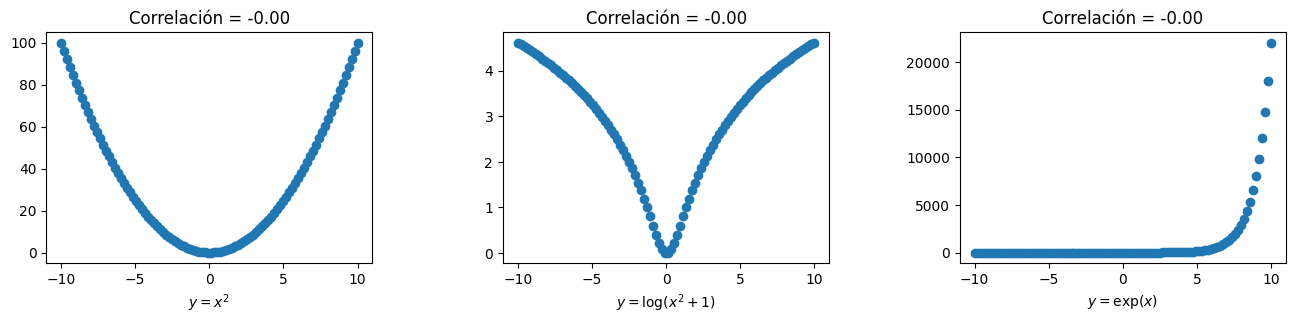

In [23]:
#@title Caso No lineal

x_nonlinear = np.linspace(-10,10,100)
x_nonlinear = np.vstack((x_nonlinear,x_nonlinear*x_nonlinear))
x_nonlinear = np.vstack((x_nonlinear,np.log(x_nonlinear[0,]**2+1)))
x_nonlinear = np.vstack((x_nonlinear,np.exp(x_nonlinear[0,])))

def correlate(matrix, corr=st.pearsonr):
    rows, cols = matrix.shape[0], matrix.shape[1]
    r = np.ones(shape=(rows, rows))
    p = np.ones(shape=(rows, rows))
    for i in range(rows):
        for j in range(i+1, rows):
            r_, p_ = corr(matrix[i], matrix[j])
            r[i, j] = r[j, i] = r_
            p[i, j] = p[j, i] = p_
            
    return r, p

r,p = correlate(x_nonlinear)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 3))
title = ['$y=x^2$', '$y=\log(x^2+1)$','$y=\exp(x)$']
for i in [0,1,2]:
    ax[i].scatter(x_nonlinear[0,],x_nonlinear[1+i,])
    ax[i].title.set_text('Correlación = ' + "{:.2f}".format(r[0,2]))
                        # + '\n p = ' + "{:.4f}".format(p[0,2]))
    
    ax[i].set(xlabel=title[i])

fig.subplots_adjust(wspace=.4)
plt.show()

Así como existe el coeficiente $r$ de Pearson, existen muchas otras medidas de asociación. Una medida que sí es capaz de detectar cualquier tipo de correlación entre dos variables es la [información mutua](https://es.wikipedia.org/wiki/Informaci%C3%B3n_mutua), la cual de paso nos introduce al interesante mundo de la Teoría de la Información.

# Dos grandes teoremas

Para terminar la clase, veamos rápidamente dos teoremas fundamentales de la Teoría de Probabilidades.

## Ley de los Grandes Números

La Ley de los Grandes Números dice, básicamente, que a medida que tomamos más y más muestras de una distribución de probabilidad, el promedio de estas muestras se parece más y más a la esperanza de la distribución. Pero pensemos un momento cómo formalizar esto, y así arribar al enunciado formal del teorema. Si bien dicho así suena fácil, este resultado habla de la convergencia de una variable aleatoria. De hecho hay varias versiones del teorema, cada uno correspondiente a una manera distinta de formalizar la idea que acabamos de esbozar.

Lo primero que tenemos que notar es que "tomar la muestra número $1$" es en sí mismo un experimento aleatorio. Al fin y al cabo, si el resultado de tomar la primera muestra fuera determinístico, no habría ninguna probabilidad involucrada. Es decir que si llamamos $f$ a la distribución que estamos sampleando, la primera muestra va a corresponder a una v.a. $X_1 \sim f$. Pero lo mismo va a pasar con la segunda: $X_2 \sim f$, y así siguiendo. Es decir que en primera instancia, tenemos una cantidad $n$ de variables aleatorias

$$X_1, X_2, \dots X_n \sim f$$

independientes e idénticamente distribuidas. Este número de muestras $n$ es el que va a tender a infinito.

Por otro lado, tenemos que promediar las $n$ muestras. Esto corresponde a hacer la cuenta

$$ \overline{X}_n = \frac{X_1 + \dots + X_n}{n}.$$

Noten que esta es una nueva variable aleatoria $\overline{X}_n$, cuya distribución en principio *no es* $f$, y que representa el resultado de hacer el promedio de todas las muestras. De nuevo, es una variable aleatoria porque cada vez que tomemos $n$ muestras y les calculemos el promedio, vamos a obtener un número distinto (adelanto de Estadística: $\overline{X}_n$ es lo que se denomina un *estadístico*: una cantidad que podemos calcular exclusivamente a partir de nuestros datos).

Veamos qué tenemos hasta ahora: para cada $n$, tenemos una variable aleatoria $\overline{X}_n$. Es decir, se trata de una sucesión infinita de variables aleatorias. Lo que queríamos decir es que a medida que $n$ crece, $\overline{X}_n$ se parece cada vez más a la esperanza de la distribución $f$, que podemos llamar $\mu$ (noten que $\mu$ es la esperanza de cada una de las $X_i$ por separado).

Ahora sí estamos en condiciones de formular una de las variantes de la Ley de los Grandes Números (que se suele llamar la versión *débil*):

$$ \forall \varepsilon > 0 \quad {\displaystyle \lim _{n\rightarrow \infty }\text{Pr} \left(\left|{\overline {X}}_{n}-\mu \right|<\varepsilon \right)=1}$$

Es decir: para cualquier número $\varepsilon > 0$, por más chiquito que sea, siempre hay un número de muestras $n$ a partir del cual la probabilidad de que $\overline{X}_n$ y $\mu$ difieran en menos de $\varepsilon$ es prácticamente $1$.

Veamos a la Ley de los Grandes Números en acción con nuestro ejemplo de siempre: la tirada de un dado de seis caras.

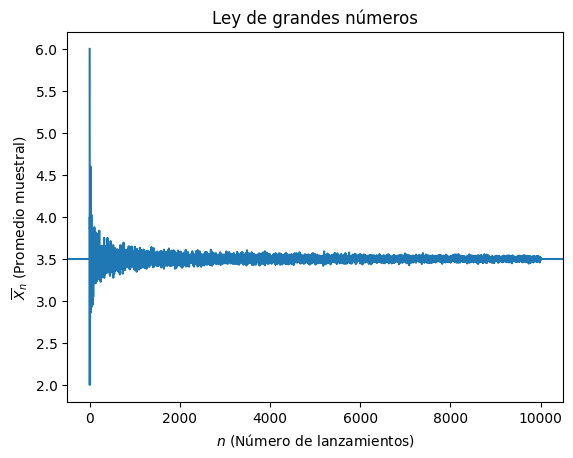

In [24]:
resultados = []
for lanzamientos in range(1,10000):
    lanzamientos = np.random.randint(1, 7, size=lanzamientos)
    promedio_hasta_ahora = lanzamientos.mean()
    resultados.append(promedio_hasta_ahora)

plt.plot(resultados)
plt.title('Ley de grandes números')
plt.axhline(3.5)
plt.xlabel(r"$n$ (Número de lanzamientos)")
plt.ylabel(r"$\overline{X}_n$ (Promedio muestral)")
plt.show()


***

Volviendo a nuestro entendimiento inicial de qué era la probabilidad a partir de realizar un experimento muchas veces (en particular con un generador de números aleatorios), el hecho de que la teoría matemática permita demostrar esta Ley es una buena justificación para la propia teoría. La Ley de los Grandes Números muestra que las abstracciones matemáticas desarrolladas capturaron correctamente el fenómeno que nos disponíamos a describir. De hecho, [puede demostrarse](https://www.win.tue.nl/~rmcastro/2WS17/files/ecdf_hist.pdf) que el histograma realizado con $n$ muestras converge probabilísticamente a la densidad de probabilidad de la distribución cuando $n$ tiende a infinito.

# Teorema del Límite Central

El Teorema del Límite Central (o Teorema Central del Límite) también nos habla de qué pasa en un cierto límite, pero la diferencia ahora es que ese límite no es necesariamente el de muchos *datos*, sino que también aplica cuando el proceso que genera nuestros datos es el resultado de una suma de muchísimos procesos pequeños. El Teorema nos dice que, bajo condiciones muy generales, si $S_n$ es la suma de $n$ variables aleatorias independientes, con esperanza y varianza finita, entonces la distribución de $S_n$ converge a una distribución normal.

Para variar, veamos este teorema en acción partiendo de una distribución continua uniforme en el intervalo $[0, 1]$, $U(0, 1)$, implementada en `scipy.stats` como `scipy.stats.uniform`. Si tomamos $n$ muestras de esta distribución, el resultado estará en el intervalo $[0, n]$. Para cada $n$, realizamos una simulación de Monte Carlo que nos muestra una aproximación de la distribución de probabilidad de $S_n = X_1 + X_2 + \dots + X_n$ donde $X_1, \dots X_n \sim U(0,1)$.

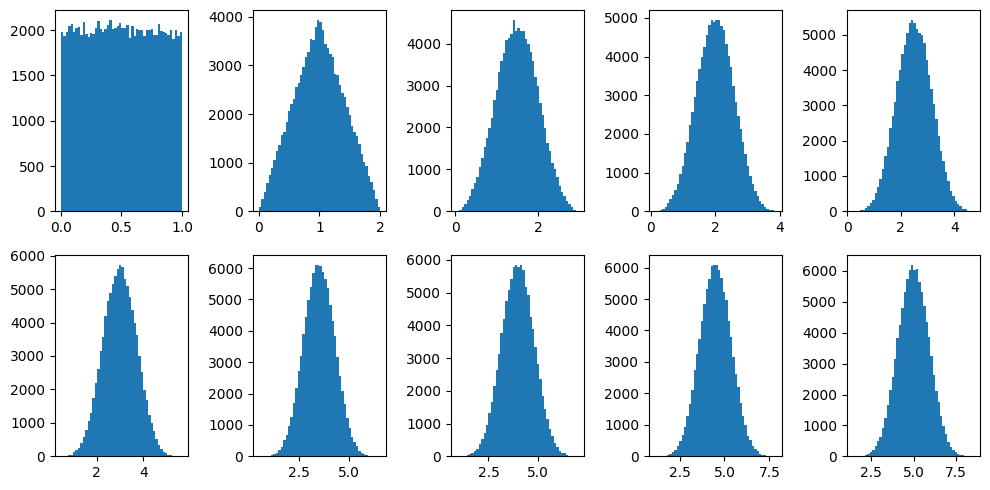

In [25]:
n = 10
samples = st.uniform.rvs(size=(100000, n))
fig, axes = plt.subplots(2, 5, figsize=(10, 5)) # solo funciona con n=10
axes = axes.flatten()
for i in range(n):
    s_n = np.sum(samples[:,:i+1], axis=1)
    axes[i].hist(s_n, bins=50)
fig.tight_layout()


Experimentalmente, muchas veces vamos a ver que con $n$ bastante chico, "a ojo" la distribución ya se parece mucho a una gaussiana.

En este caso, lo que vemos queda comprendido por la siguiente versión del Teorema (hay versiones más fuertes): sean $X_1, \dots X_n$ variables aleatorias independientes con esperanzas $\mathbb{X_i} = \mu_i$, no necesariamente iguales, pero todas con igual varianza $\sigma^2$. Sea $S_n = X_1 + \dots + X_n$.Entonces en el límite de $n \to \infty$, la variable
$$Z_n = \frac{S_n - \sum_i \mu_i}{\sqrt{n} \sigma}$$
converge (como función) a la distribución $\mathcal{N}(0, 1)$.

Esto quiere decir que $S_n$ se parece cada vez más a $\mathcal{N}(\sum_i \mu_i, \sigma)$.

En particular, podemos revisitar la situación de la Ley de los Grandes Números: como $\overline{X}_n = S_n / n$, y en aquel caso teníamos $\mu_i = \mu$ constante, a medida que $n$ crece, la distribución de $\overline{X}_n$ va haciéndose cada vez más parecida a $\mathcal{N}(\mu, \sigma/\sqrt{n})$. Es decir que la probabilidad de la distribución se va concentrando más y más alrededor de $\mu$ (dado que la dispersión estándar de la distribución va achicándose como $1/\sqrt{n}$.
***

El Teorema del Límite Central es la explicación de por qué tantos procesos en el mundo real siguen distribuciones gaussianas. No importa si las variables que estamos sumando originalmente son gaussianas o no: si muchos efectos distintos pero pequeños se van sumando para dar una variable final, la distribución de dicha variable será gaussiana (aunque no hay que confiarse demasiado: algunos procesos realmente *no* son gaussianos).

# Material Complementario

* **Enfoques frecuentista y bayesiano**
  * El Teorema de Bayes admite una interpretación increíblemente importante que no mencionamos en la clase, y en la cual se basan todos los métodos bayesianos. La idea es pensar al teorema de Bayes como una fórmula que permite *actualizar* nuestro conocimiento, representado por una distribución, en base a nuevos datos observados. Hacer esto introduce el problema del *prior* bayesiano, que tampoco llegamos a mencionar en absoluto. Para una breve introducción a estos temas pueden leer la primera sección de [estas notas](https://tereom.github.io/fundamentos/introducci%C3%B3n-a-inferencia-bayesiana-1.html) del curso de Estadística dictado por Teresa Ortiz, Alfredo Garbuno, y Felipe González en el Instituto Tecnológico Autónomo de México.
  * Todos los conceptos fundamentales que vimos pueden reinterpretarse desde un punto de vista bayesiano. [Aquí](http://www.workinginuncertainty.co.uk/probtheory_axioms.shtml) encontrarán una tabla comparativa muy buena (en inglés) que ilustra cómo podríamos haber dado toda esta clase pero con un vocabulario bayesiano en vez de frecuentista.
  * En [este breve post](https://www.netquest.com/blog/es/blog/es/bayesianos-contra-frecuentistas) de Carlos Ochoa pueden leer un poco más sobre el "conflicto" entre los enfoques frecuentista y bayesiano.
  * Así como en esta clase introdujimos la axiomatización clásica de la teoría de probabilidades, también son posibles algunas axiomatizaciones bayesianas. En [este hilo](https://stats.stackexchange.com/questions/126056/do-bayesians-accept-kolmogorovs-axioms) (en inglés) pueden encontrar una discusión muy interesante al respecto (allí, se refieren a la axiomatización clásica como "axiomas de Kolmogorov"). El resultado más clásico en este área se conoce como [Teorema de Cox](https://en.wikipedia.org/wiki/Cox%27s_theorem).
* **Teoría de la Información**:
  * Les comparto un [post](
https://jeremykun.com/2015/02/16/a-proofless-introduction-to-information-theory/)(en inglés) del blog de Jeremy Kun donde se introducen las ideas básicas de la Teoría de la Información.
  * Si bien Jeremy no introduce la información mutua en su post, pueden leer sobre ella en [su entrada de Wikipedia](https://es.wikipedia.org/wiki/Informaci%C3%B3n_mutua).
* **Números aleatorios y pseudoaleatorios**
  * Quizás alguna vez escucharon decir que los números aleatorios que genera Python no son realmente aleatorios, sino que son *pseudoaleatorios*. Esto es totalmente cierto. Pueden leer una introducción a este tema en [estas notas](https://tereom.github.io/est-computacional-2018/numeros-pseudoaleatorios.html) de otro curso de María Teresa Ortiz en el Instituto Tecnológico Autónomo de México. En particular, esto les va a servir para entender (por ejemplo) que es lo que pasa cuando utilizan la función `numpy.random.seed`, que permite "congelar" los números aleatorios de nuestro Jupyter Notebook para que siempre salgan iguales (lo cual es útil cuando se busca controlar al máximo la reproducibilidad de los resultados obtenidos).
* Para repasar probabilidades condicionales pueden leer [este otro post de Jeremy Kun](https://jeremykun.com/2013/03/28/conditional-partitioned-probability-a-primer/) (en inglés). Todo su blog es altamente recomendable.
* Sobre la convergencia del histograma empírico a la distribución de probabilidad subyacente: [The Empirical Distribution Function and the
Histogram](https://www.win.tue.nl/~rmcastro/2WS17/files/ecdf_hist.pdf), notas de Rui Castro sobre notas de Eduard Belitser (avanzado, solo para ser hojeado por valientes). 